___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.min_rows', 100)
# pd.set_option('display.width', 1000)

In [112]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

## Explore Data

In [113]:
#Female data 
df_F = pd.read_csv("ANSUR II FEMALE Public.csv", encoding= "latin-1")
df_F.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [114]:
df_F.shape

(1986, 108)

In [115]:
df_F.duplicated().sum()

0

In [116]:
df_F.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       1986 non-null   int64 
 1    abdominalextensiondepthsitting  1986 non-null   int64 
 2    acromialheight                  1986 non-null   int64 
 3    acromionradialelength           1986 non-null   int64 
 4    anklecircumference              1986 non-null   int64 
 5    axillaheight                    1986 non-null   int64 
 6    balloffootcircumference         1986 non-null   int64 
 7    balloffootlength                1986 non-null   int64 
 8    biacromialbreadth               1986 non-null   int64 
 9    bicepscircumferenceflexed       1986 non-null   int64 
 10   bicristalbreadth                1986 non-null   int64 
 11   bideltoidbreadth                1986 non-null   int64 
 12   bimalleolarbreadth              

In [117]:
df_F.isna().any().any()

True

In [118]:
for i in df_F.columns:
    if df_F[i].isna().sum() != 0:
        print(i)

Ethnicity


In [119]:
df_F.Ethnicity.value_counts(dropna=False)

NaN                                                   1467
Mexican                                                135
Caribbean Islander                                      58
Puerto Rican                                            52
Filipino                                                28
Korean                                                  23
Cherokee                                                20
Dominican                                               12
Chinese                                                 10
Vietnamese                                               7
Salvadoran                                               6
East/Asian Indian                                        6
Arab or Middle Eastern                                   6
Japanese                                                 6
Samoan                                                   6
Colombian                                                5
Panamanian                                              

In [120]:
#male
df_M = pd.read_csv("ANSUR II MALE Public.csv", encoding= "latin-1")
df_M.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [121]:
df_M.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [122]:
df_M.isna().any().any()

True

In [123]:
df_M.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [124]:
for i in df_M.columns:
    if df_M[i].isna().sum() != 0:
        print(i)

Ethnicity


In [125]:
df_M.Ethnicity.isna().sum()

3180

In [126]:
df_M.select_dtypes(include='object')

Gender       Date Installation            Component  \
0      Male   4-Oct-10    Fort Hood         Regular Army   
1      Male   4-Oct-10    Fort Hood         Regular Army   
2      Male   4-Oct-10    Fort Hood         Regular Army   
3      Male  12-Oct-10    Fort Hood         Regular Army   
4      Male  12-Oct-10    Fort Hood         Regular Army   
5      Male  12-Oct-10    Fort Hood         Regular Army   
6      Male  12-Oct-10    Fort Hood         Regular Army   
7      Male   6-Oct-10    Fort Hood         Regular Army   
8      Male   6-Oct-10    Fort Hood         Regular Army   
9      Male   6-Oct-10    Fort Hood         Regular Army   
10     Male   6-Oct-10    Fort Hood         Regular Army   
11     Male   6-Oct-10    Fort Hood         Regular Army   
12     Male   6-Oct-10    Fort Hood         Regular Army   
13     Male   6-Oct-10    Fort Hood         Regular Army   
14     Male   7-Oct-10    Fort Hood         Regular Army   
15     Male   6-Oct-10    Fort Hood         Regular Army   
16     Male   7-Oct-10    Fort Hood         Regular Army   
17     Male   7-Oct-10    Fort Hood         Regular Army   
18     Male   7-Oct-10    Fort Hood         Regular Army   
19     Male   7-Oct-10    Fort Hood         Regular Army   
20     Male   7-Oct-10    Fort Hood         Regular Army   
21     Male   7-Oct-10    Fort Hood         Regular Army   
22     Male   7-Oct-10    Fort Hood         Regular Army   
23     Male   7-Oct-10    Fort Hood         Regular Army   
24     Male   7-Oct-10    Fort Hood         Regular Army   
25     Male   7-Oct-10    Fort Hood         Regular Army   
26     Male   7-Oct-10    Fort Hood         Regular Army   
27     Male   7-Oct-10    Fort Hood         Regular Army   
28     Male   7-Oct-10    Fort Hood         Regular Army   
29     Male   7-Oct-10    Fort Hood         Regular Army   
30     Male   7-Oct-10    Fort Hood         Regular Army   
31     Male   7-Oct-10    Fort Hood         Regular Army   
32     Male   7-Oct-10    Fort Hood         Regular Army   
33     Male   7-Oct-10    Fort Hood         Regular Army   
34     Male   7-Oct-10    Fort Hood         Regular Army   
35     Male  12-Oct-10    Fort Hood         Regular Army   
36     Male  12-Oct-10    Fort Hood         Regular Army   
37     Male  12-Oct-10    Fort Hood         Regular Army   
38     Male  12-Oct-10    Fort Hood         Regular Army   
39     Male  12-Oct-10    Fort Hood         Regular Army   
40     Male  12-Oct-10    Fort Hood         Regular Army   
41     Male  12-Oct-10    Fort Hood         Regular Army   
42     Male  12-Oct-10    Fort Hood         Regular Army   
43     Male  12-Oct-10    Fort Hood         Regular Army   
44     Male  12-Oct-10    Fort Hood         Regular Army   
45     Male  12-Oct-10    Fort Hood         Regular Army   
46     Male  12-Oct-10    Fort Hood         Regular Army   
47     Male  13-Oct-10    Fort Hood         Regular Army   
48     Male  12-Oct-10    Fort Hood         Regular Army   
49     Male  12-Oct-10    Fort Hood         Regular Army   
...     ...        ...          ...                  ...   
4032   Male  28-Mar-12  Camp Shelby  Army National Guard   
4033   Male  28-Mar-12  Camp Shelby  Army National Guard   
4034   Male  28-Mar-12  Camp Shelby  Army National Guard   
4035   Male  28-Mar-12  Camp Shelby  Army National Guard   
4036   Male  28-Mar-12  Camp Shelby  Army National Guard   
4037   Male  28-Mar-12  Camp Shelby  Army National Guard   
4038   Male  28-Mar-12  Camp Shelby  Army National Guard   
4039   Male  28-Mar-12  Camp Shelby  Army National Guard   
4040   Male  29-Mar-12  Camp Shelby  Army National Guard   
4041   Male  29-Mar-12  Camp Shelby  Army National Guard   
4042   Male  29-Mar-12  Camp Shelby  Army National Guard   
4043   Male  29-Mar-12  Camp Shelby  Army National Guard   
4044   Male  29-Mar-12  Camp Shelby  Army National Guard   
4045   Male  29-Mar-12  Camp Shelby  Army National Guard   
4046   Male  29-Mar-12  Camp Shelby  Army Nat

In [127]:
df_F.select_dtypes(include='object')

Gender       Date Installation            Component  \
0     Female   5-Oct-10    Fort Hood         Regular Army   
1     Female   5-Oct-10    Fort Hood         Regular Army   
2     Female   5-Oct-10    Fort Hood         Regular Army   
3     Female   5-Oct-10    Fort Hood         Regular Army   
4     Female   5-Oct-10    Fort Hood         Regular Army   
5     Female   5-Oct-10    Fort Hood         Regular Army   
6     Female   5-Oct-10    Fort Hood         Regular Army   
7     Female   5-Oct-10    Fort Hood         Regular Army   
8     Female   5-Oct-10    Fort Hood         Regular Army   
9     Female   5-Oct-10    Fort Hood         Regular Army   
10    Female   5-Oct-10    Fort Hood         Regular Army   
11    Female   5-Oct-10    Fort Hood         Regular Army   
12    Female   5-Oct-10    Fort Hood         Regular Army   
13    Female   5-Oct-10    Fort Hood         Regular Army   
14    Female   5-Oct-10    Fort Hood         Regular Army   
15    Female   5-Oct-10    Fort Hood         Regular Army   
16    Female   5-Oct-10    Fort Hood         Regular Army   
17    Female   5-Oct-10    Fort Hood         Regular Army   
18    Female   5-Oct-10    Fort Hood         Regular Army   
19    Female   5-Oct-10    Fort Hood         Regular Army   
20    Female   6-Oct-10    Fort Hood         Regular Army   
21    Female   6-Oct-10    Fort Hood         Regular Army   
22    Female   6-Oct-10    Fort Hood         Regular Army   
23    Female   6-Oct-10    Fort Hood         Regular Army   
24    Female   6-Oct-10    Fort Hood         Regular Army   
25    Female   6-Oct-10    Fort Hood         Regular Army   
26    Female   6-Oct-10    Fort Hood         Regular Army   
27    Female  27-Oct-10    Fort Hood         Regular Army   
28    Female  27-Oct-10    Fort Hood         Regular Army   
29    Female  27-Oct-10    Fort Hood         Regular Army   
30    Female  27-Oct-10    Fort Hood         Regular Army   
31    Female  27-Oct-10    Fort Hood         Regular Army   
32    Female  27-Oct-10    Fort Hood         Regular Army   
33    Female  27-Oct-10    Fort Hood         Regular Army   
34    Female  27-Oct-10    Fort Hood         Regular Army   
35    Female  29-Oct-10    Fort Hood         Regular Army   
36    Female  29-Oct-10    Fort Hood         Regular Army   
37    Female  29-Oct-10    Fort Hood         Regular Army   
38    Female  29-Oct-10    Fort Hood         Regular Army   
39    Female  29-Oct-10    Fort Hood         Regular Army   
40    Female  29-Oct-10    Fort Hood         Regular Army   
41    Female  29-Oct-10    Fort Hood         Regular Army   
42    Female  29-Oct-10    Fort Hood         Regular Army   
43    Female  29-Oct-10    Fort Hood         Regular Army   
44    Female  29-Oct-10    Fort Hood         Regular Army   
45    Female  29-Oct-10    Fort Hood         Regular Army   
46    Female   3-Nov-10    Fort Hood         Regular Army   
47    Female   3-Nov-10    Fort Hood         Regular Army   
48    Female   3-Nov-10    Fort Hood         Regular Army   
49    Female   3-Nov-10    Fort Hood         Regular Army   
...      ...        ...          ...                  ...   
1936  Female   3-Apr-12  Camp Shelby  Army National Guard   
1937  Female   3-Apr-12  Camp Shelby  Army National Guard   
1938  Female   3-Apr-12  Camp Shelby  Army National Guard   
1939  Female   3-Apr-12  Camp Shelby  Army National Guard   
1940  Female   3-Apr-12  Camp Shelby  Army National Guard   
1941  Female   5-Apr-12  Camp Shelby  Army National Guard   
1942  Female   5-Apr-12  Camp Shelby  Army National Guard   
1943  Female   5-Apr-12  Camp Shelby  Army National Guard   
1944  Female   5-Apr-12  Camp Shelby  Army National Guard   
1945  Female   5-Apr-12  Camp Shelby  Army National Guard   
1946  Female   5-Apr-12  Camp Shelby  Army National Guard   
1947  Female   5-Apr-12  Camp Shelby  Army National Guard   
1948  Female   5-Apr-12  Camp Shelby  Army National Guard   
1949  Female   5-Apr-12  Camp Shelby  Arm

In [128]:
df_F.shape

(1986, 108)

In [129]:
df_M.shape

(4082, 108)

In [130]:
df_M.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [131]:
df_F.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [132]:
pd.DataFrame((df_M['Gender'], df_F['Gender']))

0       1       2       3       4       5       6       7     \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          8       9       10      11      12      13      14      15    \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          16      17      18      19      20      21      22      23    \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          24      25      26      27      28      29      30      31    \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          32      33      34      35      36      37      38      39    \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          40      41      42      43      44      45      46      47    \
Gender    Male    Male    Male    Male    Male    Male    Male    Male   
Gender  Female  Female  Female  Female  Female  Female  Female  Female   

          48      49    ...  4032  4033  4034  4035  4036  4037  4038  4039  \
Gender    Male    Male  ...  Male  Male  Male  Male  Male  Male  Male  Male   
Gender  Female  Female  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        4040  4041  4042  4043  4044  4045  4046  4047  4048  4049  4050  \
Gender  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male   
Gender   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        4051  4052  4053  4054  4055  4056  4057  4058  4059  4060  4061  \
Gender  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male   
Gender   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        4062  4063  4064  4065  4066  4067  4068  4069  4070  4071  4072  \
Gender  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male  Male   
Gender   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        4073  4074  4075  4076  4077  4078  4079  4080  4081  
Gender  Male  Male  Male  Male  Male  Male  Male  Male  Male  
Gender   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 4082 columns]

In [133]:
(df_M.columns == df_F.columns).sum()

107

In [134]:
(df_M.columns != df_F.columns).sum()

1

In [135]:
df_M.columns != df_F.columns

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [136]:
df_F.rename(columns={'SubjectId': 'subjectid'}, inplace=True)

In [137]:
(df_M.columns != df_F.columns).sum()

0

In [138]:
(df_M.columns == df_F.columns).sum()

108

In [139]:
df_C = pd.concat((df_M, df_F), axis=0)

In [140]:
df_C.head(2)

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232               781   

   footbreadthhorizontal  footlength  forearmcenterofgriplength  \
0                    101         273                        349   
1                     98         263                        348   

   forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  \
0                         299                    575                477   
1                         289                    523                476   

   functionalleglength  handbreadth  handcircumference  handlength  \
0                 1136           90                214         193   
1                 1096           86                203         195   

   headbreadth  headcircumference  headlength  heelanklecircumference  \
0          150                583         206                     326   
1          146                568         201                     334   

   heelbreadth  ...  lateralfemoralepicondyleheight  lateralmalleolusheight  \
0           70  ...                             500                      77   
1           72  ...                             488                      73   

   lowerthighcircumference  mentonsellionlength  neckcircumference  \
0                      391                  118                400   
1                      371                  131                380   

   neckcircumferencebase  overheadfingertipreachsitting  palmlength  \
0                    436                           1447         113   
1                    420                           1380         118   

   poplitealheight  radialestylionlength  shouldercircumference  \
0              437                   273                   1151   
1              417                   254                   1119   

   shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  \
0                  368             145            928              

In [141]:
df_C.shape

(6068, 108)

In [142]:
df_F.shape[0] + df_M.shape[0]

6068

In [143]:
df_C.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [144]:
df_C.isna().any().any()

True

In [145]:
for i in df_C.columns:
    if df_C[i].isna().sum() != 0:
        print(i)

Ethnicity


In [146]:
df_C['Ethnicity'].isna().sum()

4647

In [147]:
df_C['Ethnicity'].isna().sum()/df_C.shape[0]

0.765820698747528

In [148]:
#more than 76% null drop 'Ethnicity'
df_C.drop(columns=['Ethnicity'], axis=1,inplace=True)

In [149]:
df_C.shape

(6068, 107)

In [150]:
df_C.isna().any().any()

False

In [151]:
df_C.duplicated().sum()

0

In [152]:
df_C.select_dtypes(include='object')

Gender       Date Installation            Component  \
0       Male   4-Oct-10    Fort Hood         Regular Army   
1       Male   4-Oct-10    Fort Hood         Regular Army   
2       Male   4-Oct-10    Fort Hood         Regular Army   
3       Male  12-Oct-10    Fort Hood         Regular Army   
4       Male  12-Oct-10    Fort Hood         Regular Army   
5       Male  12-Oct-10    Fort Hood         Regular Army   
6       Male  12-Oct-10    Fort Hood         Regular Army   
7       Male   6-Oct-10    Fort Hood         Regular Army   
8       Male   6-Oct-10    Fort Hood         Regular Army   
9       Male   6-Oct-10    Fort Hood         Regular Army   
10      Male   6-Oct-10    Fort Hood         Regular Army   
11      Male   6-Oct-10    Fort Hood         Regular Army   
12      Male   6-Oct-10    Fort Hood         Regular Army   
13      Male   6-Oct-10    Fort Hood         Regular Army   
14      Male   7-Oct-10    Fort Hood         Regular Army   
15      Male   6-Oct-10    Fort Hood         Regular Army   
16      Male   7-Oct-10    Fort Hood         Regular Army   
17      Male   7-Oct-10    Fort Hood         Regular Army   
18      Male   7-Oct-10    Fort Hood         Regular Army   
19      Male   7-Oct-10    Fort Hood         Regular Army   
20      Male   7-Oct-10    Fort Hood         Regular Army   
21      Male   7-Oct-10    Fort Hood         Regular Army   
22      Male   7-Oct-10    Fort Hood         Regular Army   
23      Male   7-Oct-10    Fort Hood         Regular Army   
24      Male   7-Oct-10    Fort Hood         Regular Army   
25      Male   7-Oct-10    Fort Hood         Regular Army   
26      Male   7-Oct-10    Fort Hood         Regular Army   
27      Male   7-Oct-10    Fort Hood         Regular Army   
28      Male   7-Oct-10    Fort Hood         Regular Army   
29      Male   7-Oct-10    Fort Hood         Regular Army   
30      Male   7-Oct-10    Fort Hood         Regular Army   
31      Male   7-Oct-10    Fort Hood         Regular Army   
32      Male   7-Oct-10    Fort Hood         Regular Army   
33      Male   7-Oct-10    Fort Hood         Regular Army   
34      Male   7-Oct-10    Fort Hood         Regular Army   
35      Male  12-Oct-10    Fort Hood         Regular Army   
36      Male  12-Oct-10    Fort Hood         Regular Army   
37      Male  12-Oct-10    Fort Hood         Regular Army   
38      Male  12-Oct-10    Fort Hood         Regular Army   
39      Male  12-Oct-10    Fort Hood         Regular Army   
40      Male  12-Oct-10    Fort Hood         Regular Army   
41      Male  12-Oct-10    Fort Hood         Regular Army   
42      Male  12-Oct-10    Fort Hood         Regular Army   
43      Male  12-Oct-10    Fort Hood         Regular Army   
44      Male  12-Oct-10    Fort Hood         Regular Army   
45      Male  12-Oct-10    Fort Hood         Regular Army   
46      Male  12-Oct-10    Fort Hood         Regular Army   
47      Male  13-Oct-10    Fort Hood         Regular Army   
48      Male  12-Oct-10    Fort Hood         Regular Army   
49      Male  12-Oct-10    Fort Hood         Regular Army   
...      ...        ...          ...                  ...   
1936  Female   3-Apr-12  Camp Shelby  Army National Guard   
1937  Female   3-Apr-12  Camp Shelby  Army National Guard   
1938  Female   3-Apr-12  Camp Shelby  Army National Guard   
1939  Female   3-Apr-12  Camp Shelby  Army National Guard   
1940  Female   3-Apr-12  Camp Shelby  Army National Guard   
1941  Female   5-Apr-12  Camp Shelby  Army National Guard   
1942  Female   5-Apr-12  Camp Shelby  Army National Guard   
1943  Female   5-Apr-12  Camp Shelby  Army National Guard   
1944  Female   5-Apr-12  Camp Shelby  Army National Guard   
1945  Female   5-Apr-12  Camp Shelby  Army National Guard   
1946  Female   5-Apr-12  Camp Shelby  Army National Guard   
1947  Female   5-Apr-12  Camp Shelby  Army National Guard   
1948  Female   5-Apr-12  Camp Shelby  Army National Guard   
1949  Female   5-Apr-12  Camp Shelby  Arm

In [153]:
for i in df_C.select_dtypes(include='object'):
    print(i, df_C[i].nunique())

Gender 2
Date 253
Installation 12
Component 3
Branch 3
PrimaryMOS 285
SubjectsBirthLocation 152
WritingPreference 3


In [154]:
df_C.Gender.value_counts(dropna=False)
#seems balanced

Male      4082
Female    1986
Name: Gender, dtype: int64

In [155]:
#WritingPreference – Writing Preference; “Right hand”, “Left hand”, or “Either hand (No preference)”
df_C.WritingPreference.value_counts(dropna=False)
#Either hand (No preference), maybe model not learn from the least sample one 

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [156]:
df_C.Installation.value_counts(dropna=False)
#Installation – U.S. Army installation where the measurement occurred- not very useful drop this

Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: Installation, dtype: int64

In [157]:
df_C.Component.value_counts()
#Component – “Army National Guard”, “Army Reserve”, or “Regular Army”
# Army Reserve less than other drop this?

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [158]:
df_C.Branch.value_counts()
#Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support”
#seems balanced-keep

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64

In [159]:
df_C.PrimaryMOS.value_counts()
# PrimaryMOS – Primary Military Occupational Specialty
#cardinality too high drop

11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
19D     123
92G     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
12N      39
13D      39
11A      38
13F      38
91C      38
35G      36
92W      34
94F      33
90A      31
91J      30
91A      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
27D      19
11Z      19
       ... 
15B       1
913A      1
63A       1
67D       1
52A       1
21R       1
12E       1
16G       1
21J       1
882A      1
91S       1
94T       1
921A      1
11H       1
18A       1
18F       1
92B       1
21Z       1
21X       1
19X       1
43B       1
68H       1
77F       1
15S       1
68R       1
52D       1
93J       1
91l       1
45B       1
15V       1
29E       1
93W       1
18C 

In [160]:
df_C.SubjectsBirthLocation.value_counts(dropna=False)
#cardinality too high drop this
#SubjectBirthLocation – Subject Birth Location; a U.S. state or foreign country

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [161]:
df_C.Date.nunique(dropna=False)
# Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”
# Not informative and high cardinality-drop

253

In [162]:
# subjectid 
# A unique number for each participant measured in the anthropometric survey, 
# ranging from 10027 to 920103, not inclusive


In [163]:
col_drop = ['subjectid','Date','PrimaryMOS', 'SubjectsBirthLocation','WritingPreference','Installation','Component']

In [164]:
df_C.drop(columns=col_drop,axis=1,inplace=True)

In [165]:
df_C.shape

(6068, 100)

In [166]:
for i in df_C.select_dtypes(include='object'):
    print(i, df_C[i].nunique())

Gender 2
Branch 3


In [167]:
df_C.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [168]:
df_C.Branch.unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

In [169]:
# #Converting to numeric
# #get all categorical columns
# cat_columns = df_C.select_dtypes(['object']).columns
# #convert all categorical columns to numeric
# df_C[cat_columns] = df_C[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [170]:
# df_C['Gender'] = df_C['Gender'].map({'Male':0,'Female':1})
# df_C['Branch'] = df_C['Branch'].map({'Combat Arms':0,'Combat Support':1,'Combat Service Support':2})

In [171]:
df_C.head(1)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
0              247               802                    101         273   

   forearmcenterofgriplength  forearmcircumferenceflexed  \
0                        349                         299   

   forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  \
0                    575                477                 1136           90   

   handcircumference  handlength  headbreadth  headcircumference  headlength  \
0                214         193          150                583         206   

   heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  \
0                     326           70         332                366   

   iliocristaleheight  interpupillarybreadth  interscyei  interscyeii  \
0                1071                    685         422          441   

   kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  \
0                   502                560                             500   

   lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
0                      77                      391                  118   

   neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  \
0                400                    436                           1447   

   palmlength  poplitealheight  radialestylionlength  shouldercircumference  \
0         113              437                   273                   1151   

   shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  \
0                  368             145            928                     883   

   sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  \
0            600  1782     1776                 1449            1092   

   thighcircumference  thighclearance  thumbtipreach  tibialheight  \
0                 610             164            786           491   

   tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  \
0               140                  919                           1700   

   waistbacklength  waistbreadth  waistcircumference  waistdepth  \
0              501           329                 933         240   

   waistfrontlengthsitting  waistheightomphalion  weightkg  \
0                      440                  1054       815   

   wristcircumference  wristheight Gender       Branch  SubjectNumericRace  \
0                 175          853   Male  Combat Arms                   1   

   DODRace  Age  Heightin  Weightlbs  
0        1   41        71        180

In [172]:
(df_C.SubjectNumericRace != df_C.DODRace).sum()

806

In [173]:
(df_C.SubjectNumericRace == df_C.DODRace).sum()
#SubjectNumericRace predict pretiy much DODRace

5262

In [174]:
(df_C.SubjectNumericRace == df_C.DODRace).sum()/df_C.shape[0]

0.8671720500988793

In [175]:
#Target variable
df_C.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [176]:
#drop rows (smaple) values counts less than 500- models not learn from them
value_c_DODRace = df_C['DODRace'].value_counts()
to_remove_DODRace = value_c_DODRace[value_c_DODRace < 500].index
to_remove_DODRace

Int64Index([4, 6, 5, 8], dtype='int64')

In [177]:
# Keep rows where DODRace is not in to_remove
df_C = df_C[~df_C.DODRace.isin(to_remove_DODRace)]

In [178]:
#alternative drop -check again not good
# ind = df_C[((df_C.DODRace == 4) | (df_C.DODRace == 6) |(df_C.DODRace == 5) | (df_C.DODRace == 8))].index
# df_C.drop(index=ind, axis=0).shape

In [179]:
df_C.shape

(5769, 100)

In [180]:
df_C.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        5769.000        5769.000               5769.000   
mean                          247.254        1408.630                328.072   
std                            37.458          78.303                 20.445   
min                           155.000        1146.000                249.000   
25%                           220.000        1353.000                314.000   
50%                           243.000        1412.000                328.000   
75%                           272.000        1464.000                342.000   
max                           451.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            5769.000      5769.000                 5769.000   
mean              225.202      1301.903                  244.408   
std                15.966        71.261                   16.804   
min               156.000      1062.000                  186.000   
25%               214.000      1252.000                  233.000   
50%               225.000      1304.000                  245.000   
75%               235.000      1351.000                  256.000   
max               293.000      1553.000                  306.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          5769.000           5769.000                   5769.000   
mean            195.119            399.706                    341.663   
std              13.379             30.124                     41.271   
min             151.000            283.000                    216.000   
25%             186.000            377.000                    312.000   
50%             196.000            404.000                    342.000   
75%             205.000            422.000                    370.000   
max             245.000            489.000                    490.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          5769.000          5769.000            5769.000   
mean            274.903           491.455              72.335   
std              19.240            42.012               5.327   
min             197.000           357.000              55.000   
25%             262.000           461.000              68.000   
50%             274.000           493.000              73.000   
75%             288.000           520.000              76.000   
max             362.000           637.000              91.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          5769.000                   5769.000            5769.000   
mean            324.962                    306.678             139.529   
std              17.050                     20.819               7.249   
min             267.000                    245.000             116.000   
25%             314.000                    292.000             134.000   
50%             326.000                    307.000             140.000   
75%             336.000                    321.000             145.000   
max             385.000                    390.000             166.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              5769.000      5769.000       5769.000           5769.000   
mean               1022.059       242.234        872.113            610.450   
std                  75.953        26.409         54.065             33.121   
min                 737.000       168.000        656.000            479.000   
25%                 970.000       223.000        834.000            587.000   
50%                1019.000       241.000        870.000            610.000   
75%                1071.000       259.000        908.000            633.000   
max                1341.000       349.000       1080.000            736.000   

       buttockpopliteallength  calfcircumference  

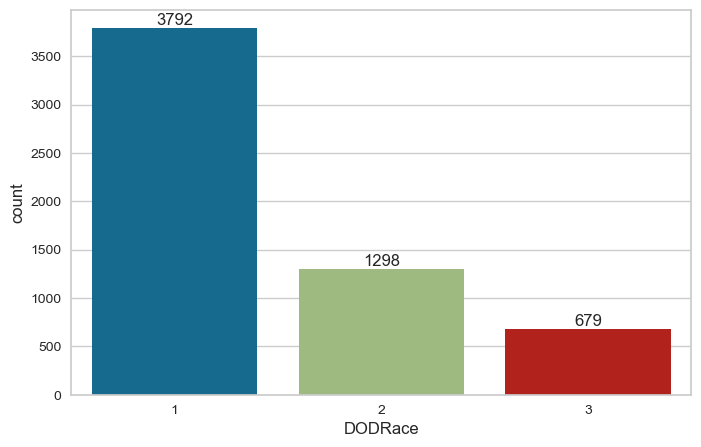

In [181]:
ax = sns.countplot(data = df_C, x ='DODRace')
ax.bar_label(ax.containers[0]);

### Multicollinearity check

In [182]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
df_C.corr().style.applymap(color_red)

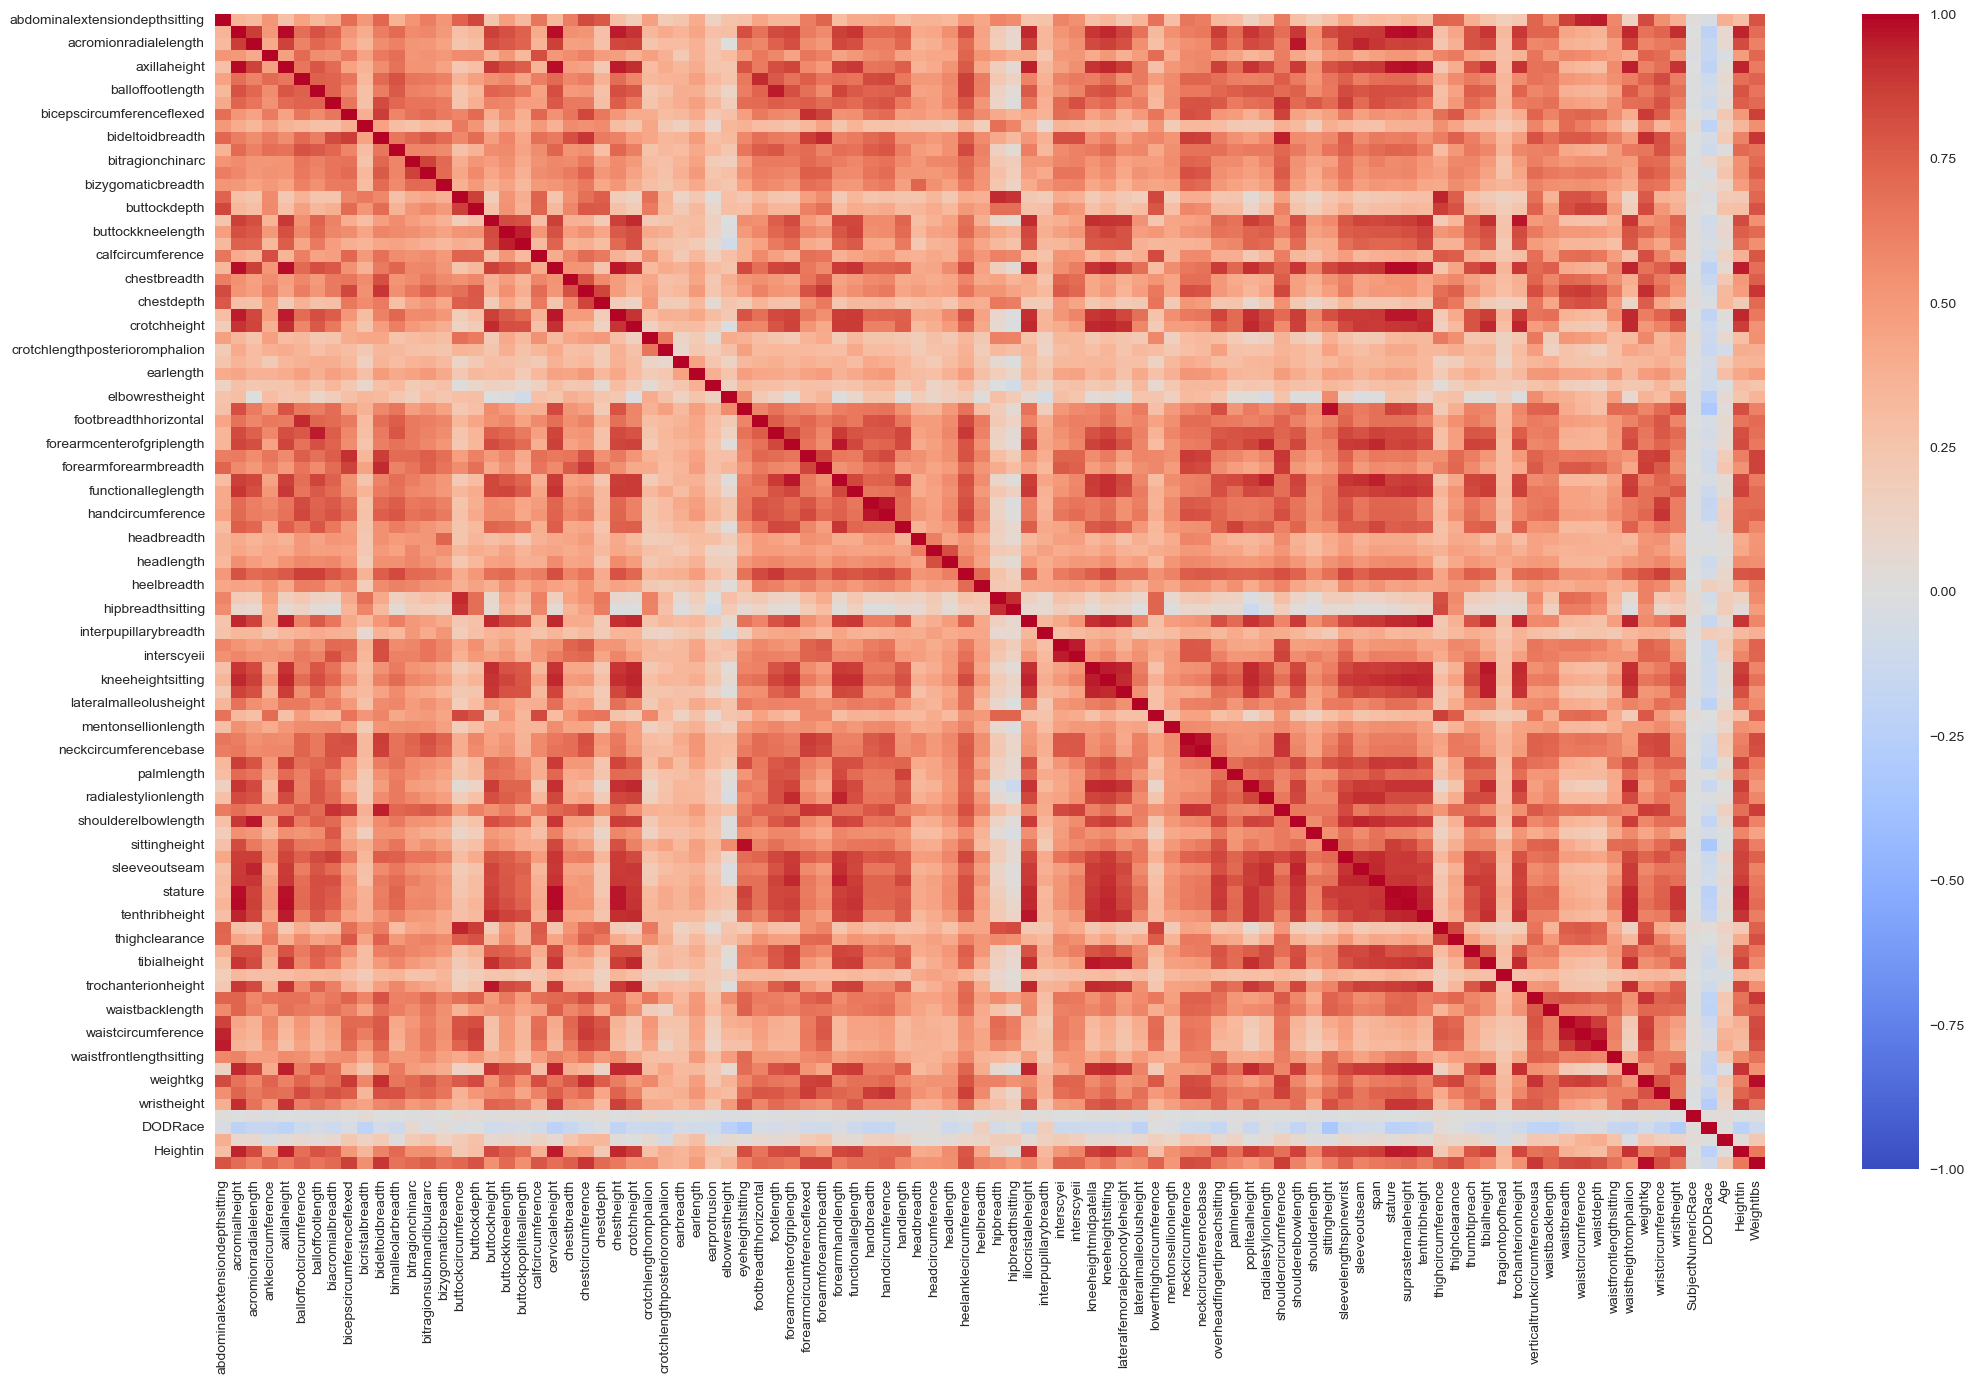

In [183]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_C.corr(numeric_only=True), vmin=-1, vmax=1, annot=False, cmap="coolwarm");

In [184]:
(df_C.SubjectNumericRace == df_C.DODRace).sum()

5101

In [185]:
df_C.DODRace.corr(df_C.SubjectNumericRace)

0.019567113652569103

<Axes: xlabel='SubjectNumericRace', ylabel='DODRace'>

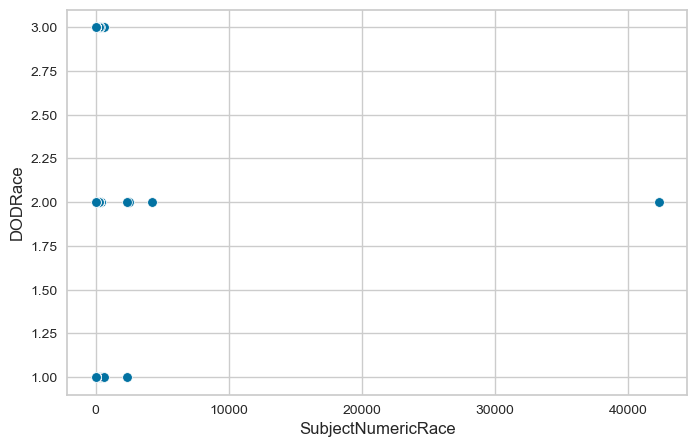

In [186]:
sns.scatterplot(x=df_C.SubjectNumericRace ,y = df_C.DODRace)

In [187]:
# SubjectNumericRace – Subject Numeric Race; 
# a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview).
# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

df_C.SubjectNumericRace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [188]:
# df["SubjectNumericRace"] = df["SubjectNumericRace"].astype("str").apply(lambda x : float('%.2f'% float(re.findall("([,0-9]+)", x)[0].replace(",", ""))) if x.startswith("€") else np.nan)

In [189]:
df_C.SubjectNumericRace.apply(lambda x : round(np.array(list(map(int, str(x)))).mean())).value_counts()

1    3559
2    1303
3     692
8     106
4      71
5      28
6      10
Name: SubjectNumericRace, dtype: int64

In [190]:
df_C.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [191]:
#drop this becasue misleading
df_C.drop(columns = ['SubjectNumericRace'], axis=1 , inplace = True)

In [192]:
df_C.head(1)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   

   bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  \
0               274               493                  71               319   

   bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  \
0                        291                 142                   979   

   buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  \
0           240            882                619                     509   

   calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0                373             1535           291                1074   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  \
0         259         1292           877                    607   

   crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
0                             351          36         71             19   

   elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
0              247               802                    101         273   

   forearmcenterofgriplength  forearmcircumferenceflexed  \
0                        349                         299   

   forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  \
0                    575                477                 1136           90   

   handcircumference  handlength  headbreadth  headcircumference  headlength  \
0                214         193          150                583         206   

   heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  \
0                     326           70         332                366   

   iliocristaleheight  interpupillarybreadth  interscyei  interscyeii  \
0                1071                    685         422          441   

   kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  \
0                   502                560                             500   

   lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
0                      77                      391                  118   

   neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  \
0                400                    436                           1447   

   palmlength  poplitealheight  radialestylionlength  shouldercircumference  \
0         113              437                   273                   1151   

   shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  \
0                  368             145            928                     883   

   sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  \
0            600  1782     1776                 1449            1092   

   thighcircumference  thighclearance  thumbtipreach  tibialheight  \
0                 610             164            786           491   

   tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  \
0               140                  919                           1700   

   waistbacklength  waistbreadth  waistcircumference  waistdepth  \
0              501           329                 933         240   

   waistfrontlengthsitting  waistheightomphalion  weightkg  \
0                      440                  1054       815   

   wristcircumference  wristheight Gender       Branch  DODRace  Age  \
0                 175          853   Male  Combat Arms        1   41   

   Heightin  Weightlbs  
0        71        180

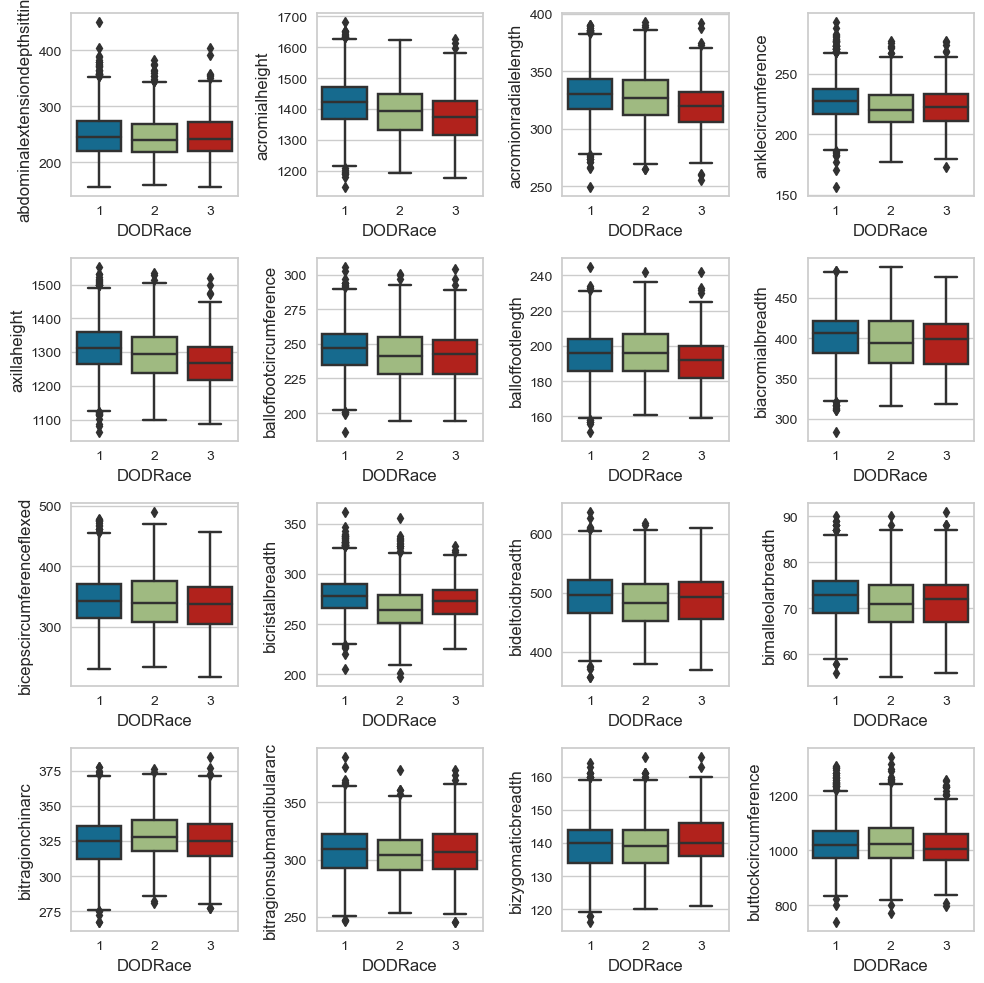

In [193]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[:16]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

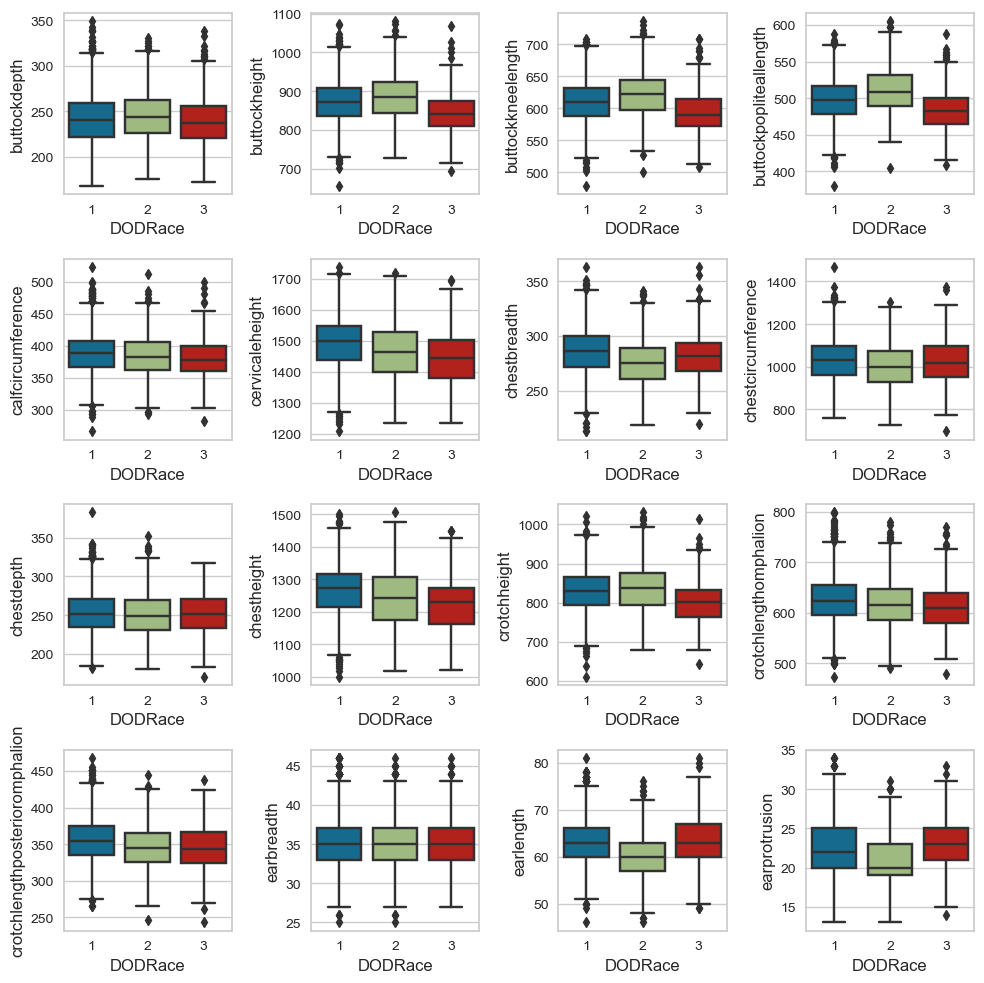

In [194]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[16:32]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

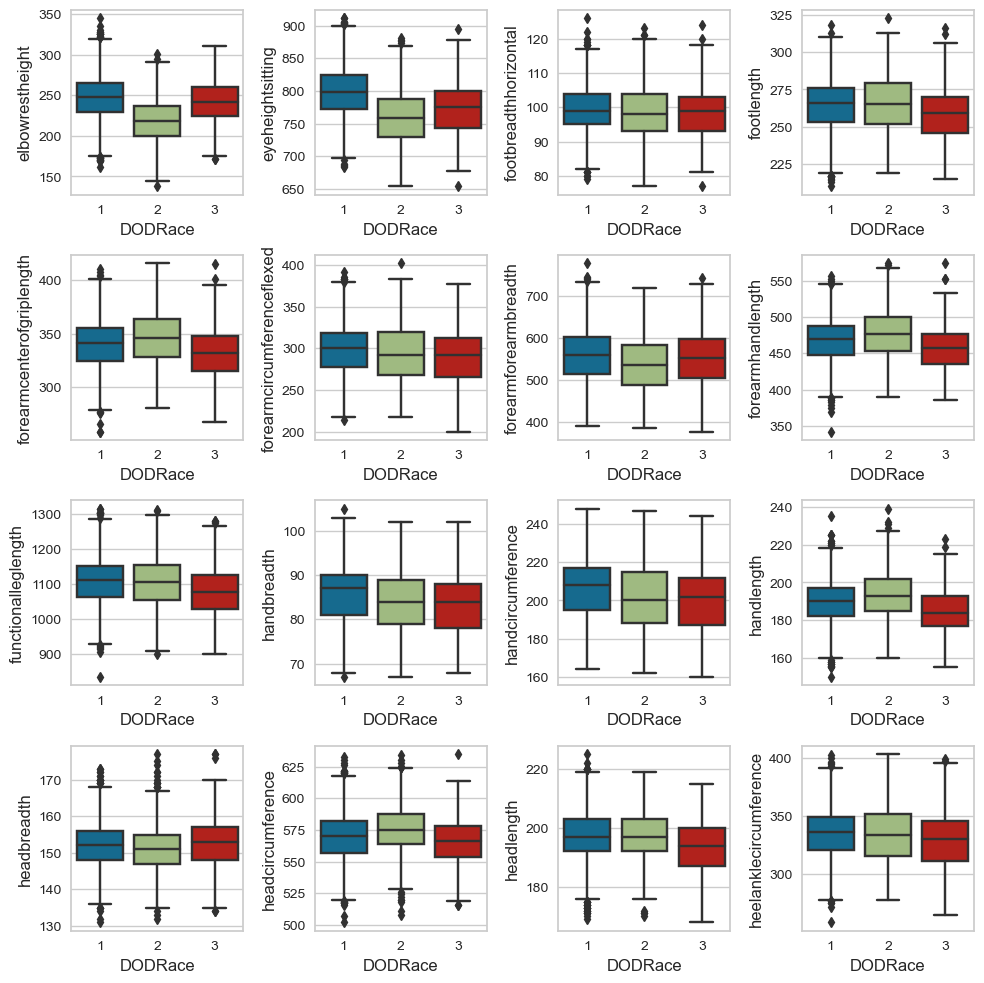

In [195]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[32:48]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

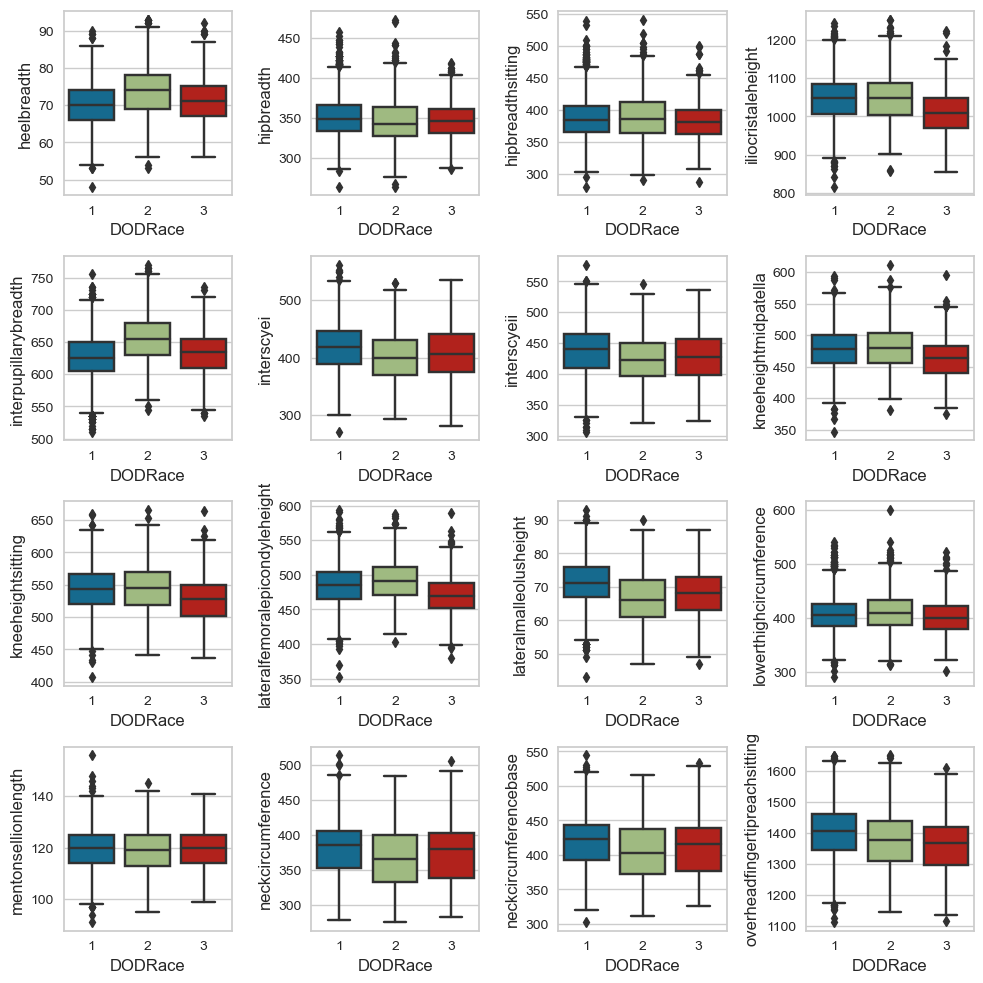

In [196]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[48:64]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

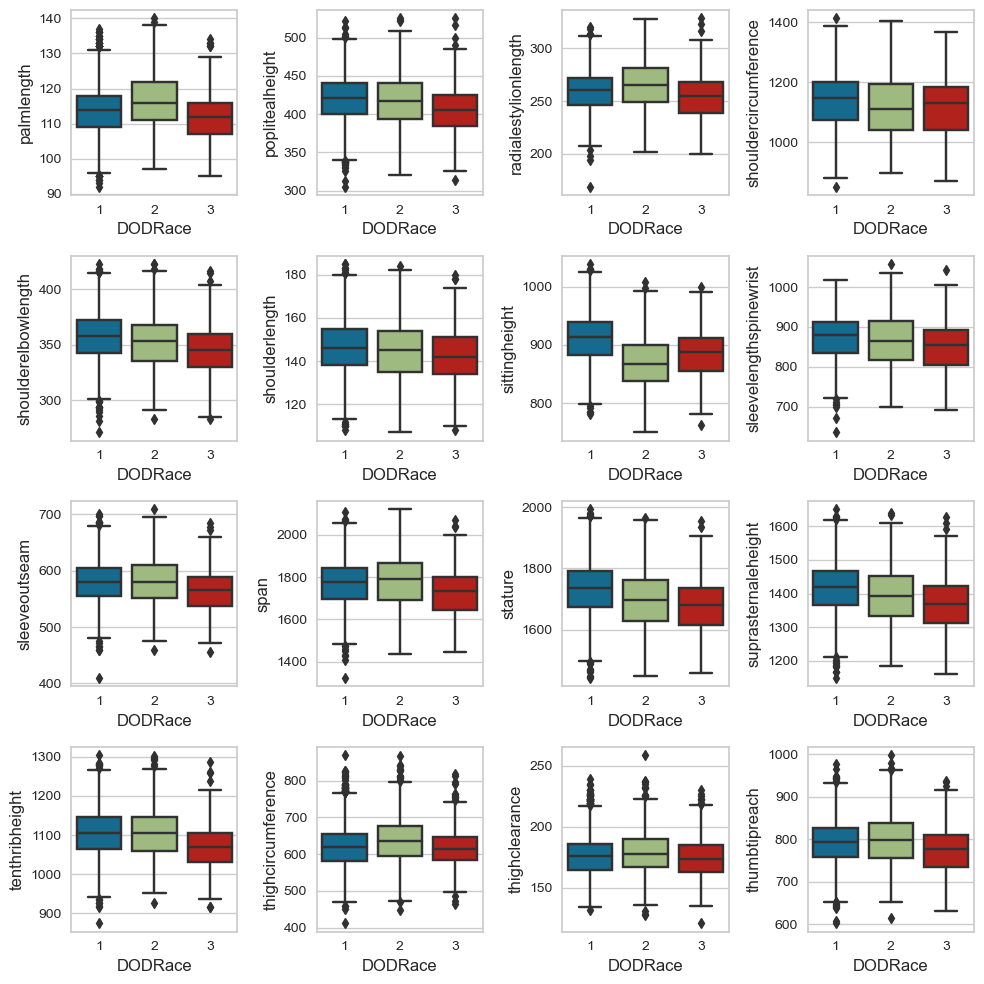

In [197]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[64:80]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

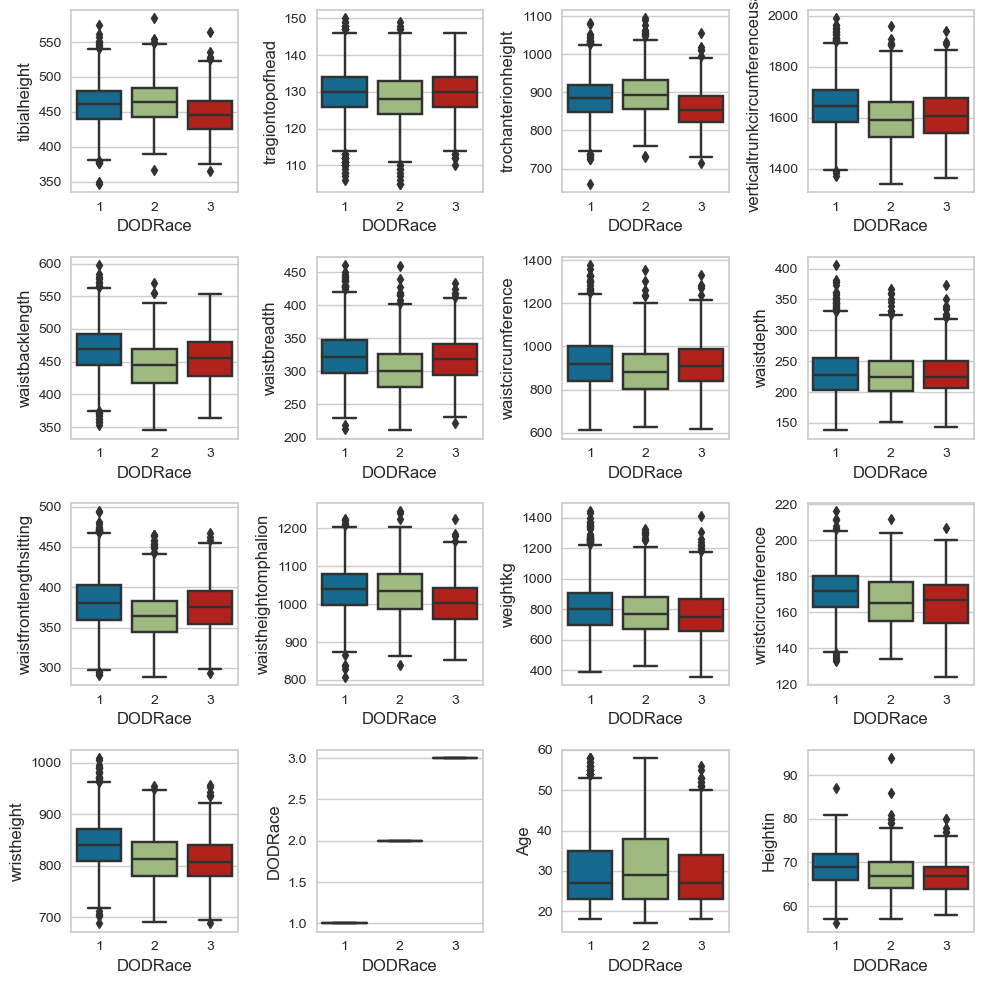

In [198]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[80:96]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

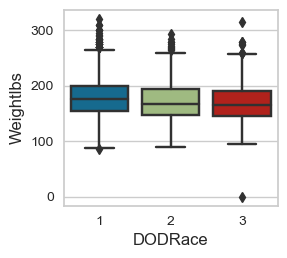

In [199]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_C.select_dtypes(include=np.number).columns[96:]):
        plt.subplot(4,4,i+1)
        ax = sns.boxplot(x="DODRace", y=df_C[col], data=df_C)
        
plt.tight_layout();

In [200]:
df_C.shape

(5769, 99)

In [201]:
#some columns are taken from participant and also mesured by professionally, drop them
# Heightin – Height in Inches; self-reported, comparable to measured “stature”
# Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”
col_dub = ['Weightlbs', 'Heightin']
df_C.drop(columns=col_dub, axis=1, inplace=True)

In [202]:
df_C.shape

(5769, 97)

In [203]:
df_C.select_dtypes(include ='object').columns

Index(['Gender', 'Branch'], dtype='object')

In [204]:
df_C.select_dtypes(include ='number').columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [205]:
from sklearn.model_selection import train_test_split

X = df_C.drop(["DODRace"], axis=1)
y = df_C["DODRace"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=42)


In [206]:
X_test.shape, y_test.shape

((1154, 96), (1154,))

In [207]:
y_train.value_counts(), y_test.value_counts() #proporsional 

(1    3034
 2    1038
 3     543
 Name: DODRace, dtype: int64,
 1    758
 2    260
 3    136
 Name: DODRace, dtype: int64)

In [208]:
df_C.Branch.unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

#### Define transformer and encoder

In [209]:
cat_onehot = ['Gender','Branch']  # will be used distance based algorithms 
cat_ordinal = ['Gender','Branch'] # will be used tree based algorithms (although there is no logical order)

In [210]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [211]:
#OneHot
column_trans_OneHot = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans_OneHot = column_trans_OneHot.set_output(transform="pandas")

#Ordinal

column_trans_Ord = make_column_transformer(
    (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
) 

column_trans_Ord = column_trans_Ord.set_output(transform="pandas")


In [212]:
X_train_OneHot_trans = column_trans_OneHot.fit_transform(X_train)
X_test_OneHot_trans = column_trans_OneHot.transform(X_test)

X_train_Ord_trans = column_trans_Ord.fit_transform(X_train)
X_test_Ord_trans = column_trans_Ord.transform(X_test)


In [213]:
X_train_OneHot_trans.shape, X_test_OneHot_trans.shape

((4615, 99), (1154, 99))

In [214]:
X_train_OneHot_trans.head(1)

Gender_Female  Gender_Male  Branch_Combat Arms  \
1582          0.000        1.000               0.000   

      Branch_Combat Service Support  Branch_Combat Support  \
1582                          1.000                  0.000   

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
1582                             248            1357                    309   

      anklecircumference  axillaheight  balloffootcircumference  \
1582                 248          1255                      261   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
1582               193                420                        365   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
1582               292               509                  75   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
1582               337                        314                 143   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
1582                  1023           253            831                572   

      buttockpopliteallength  calfcircumference  cervicaleheight  \
1582                     461                418             1445   

      chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  \
1582           308                1088         251         1213           781   

      crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  \
1582                    620                             368          41   

      earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
1582         67             24              257               810   

      footbreadthhorizontal  footlength  forearmcenterofgriplength  \
1582                    104         263                        327   

      forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  \
1582                         309                    595                458   

      functionalleglength  handbreadth  handcircumference  handlength  \
1582                 1062           86                209         193   

      headbreadth  headcircumference  headlength  heelanklecircumference  \
1582          151                592         210                     356   

      heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
1582           76         343                383                 996   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
1582                    630         453          476                   462   

      kneeheightsitting  lateralfemoralepicondyleheight  \
1582                536                             473   

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
1582                      78                      454                  123   

      neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  \
1582                402                    438                           1360   

      palmlength  poplitealheight  radialestylionlength  \
1582         114              408                   251   

      shouldercircumference  shoulderelbowlength  shoulderlength  \
1582                   1201                  337             146   

      sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  \
1582            935                     875            553  1717     1703   

      suprasternaleheight  tenthribheight  thighcircumference  thighclearance  \
1582                 1372            1048                 630             183   

      thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
1582            751           447               134                  845   

      verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
1582                           1677              460           340   

      waistcircumference  waistdepth  waistfrontlengthsitting  \
1582                 971         2

In [215]:
X_train_Ord_trans.shape, X_test_Ord_trans.shape

((4615, 96), (1154, 96))

In [216]:
X_train_Ord_trans.head(1)

Gender  Branch  abdominalextensiondepthsitting  acromialheight  \
1582   1.000   1.000                             248            1357   

      acromionradialelength  anklecircumference  axillaheight  \
1582                    309                 248          1255   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
1582                      261               193                420   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
1582                        365               292               509   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
1582                  75               337                        314   

      bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
1582                 143                  1023           253            831   

      buttockkneelength  buttockpopliteallength  calfcircumference  \
1582                572                     461                418   

      cervicaleheight  chestbreadth  chestcircumference  chestdepth  \
1582             1445           308                1088         251   

      chestheight  crotchheight  crotchlengthomphalion  \
1582         1213           781                    620   

      crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  \
1582                             368          41         67             24   

      elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  \
1582              257               810                    104         263   

      forearmcenterofgriplength  forearmcircumferenceflexed  \
1582                        327                         309   

      forearmforearmbreadth  forearmhandlength  functionalleglength  \
1582                    595                458                 1062   

      handbreadth  handcircumference  handlength  headbreadth  \
1582           86                209         193          151   

      headcircumference  headlength  heelanklecircumference  heelbreadth  \
1582                592         210                     356           76   

      hipbreadth  hipbreadthsitting  iliocristaleheight  \
1582         343                383                 996   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
1582                    630         453          476                   462   

      kneeheightsitting  lateralfemoralepicondyleheight  \
1582                536                             473   

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
1582                      78                      454                  123   

      neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  \
1582                402                    438                           1360   

      palmlength  poplitealheight  radialestylionlength  \
1582         114              408                   251   

      shouldercircumference  shoulderelbowlength  shoulderlength  \
1582                   1201                  337             146   

      sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  \
1582            935                     875            553  1717     1703   

      suprasternaleheight  tenthribheight  thighcircumference  thighclearance  \
1582                 1372            1048                 630             183   

      thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
1582            751           447               134                  845   

      verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
1582                           1677              460           340   

      waistcircumference  waistdepth  waistfrontlengthsitting  \
1582                 971         242                      400   

      waistheightomphalion  weightkg  wristcircumference  wristheight  Age  
1582                   990       866                 177          813   38

#### Define scalers

In [217]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [218]:
scaler_OneHot = MinMaxScaler()

X_train_OneHot_Scaled = scaler_OneHot.fit_transform(X_train_OneHot_trans) #encoded and transformed 
X_test_OneHot_Scaled = scaler_OneHot.transform(X_test_OneHot_trans) #encoded and transformed 

In [219]:
scaler_Ord = MinMaxScaler()

X_train_Ord_Scaled = scaler_Ord.fit_transform(X_train_Ord_trans) #encoded and transformed 
X_test_Ord_Scaled = scaler_Ord.transform(X_test_Ord_trans) #encoded and transformed 

In [220]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# column_trans = make_column_transformer(
#     (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
#     (
#         OrdinalEncoder(
#             categories=[cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety]
#         ),
#         cat_ordinal,
#     ),
#     remainder="passthrough",
#     verbose_feature_names_out=False,
# )  # MinMaxScaler()

# column_trans = column_trans.set_output(transform="pandas")

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [222]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

logistic_pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

logistic_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [223]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

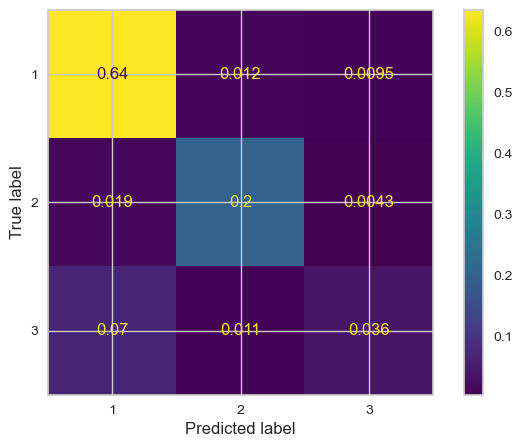

In [224]:
ConfusionMatrixDisplay.from_estimator(logistic_pipe_model, X_test, y_test, normalize="all")

In [225]:
eval_metric(logistic_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[733  14  11]
 [ 22 233   5]
 [ 81  13  42]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.90      0.90      0.90       260
           3       0.72      0.31      0.43       136

    accuracy                           0.87      1154
   macro avg       0.83      0.72      0.75      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2938   32   64]
 [  82  936   20]
 [ 311   58  174]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92      3034
           2       0.91      0.90      0.91      1038
           3       0.67      0.32      0.43       543

    accuracy                           0.88      4615
   macro avg       0.82      0.73      0.75      4615
weighted avg       0.86      0.88      0.86      4615



In [226]:
accuracy_score(y_test,logistic_pipe_model.predict(X_test))

0.8734835355285961

In [227]:
# check if ordinal encoding will make any change - this is not true use OneHot (here just for fun)

operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression()),
]

logistic_pipe_model_ord = Pipeline(steps=operations).set_output(transform="pandas")

logistic_pipe_model_ord.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

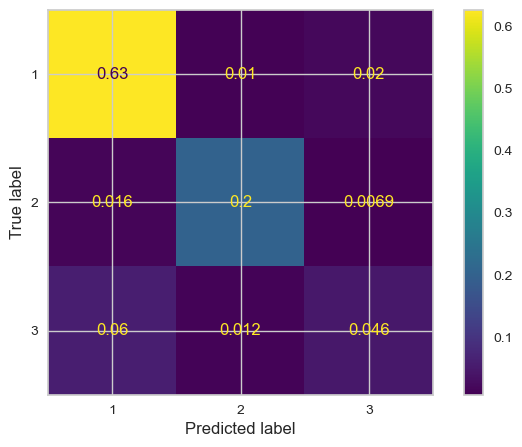

In [228]:
ConfusionMatrixDisplay.from_estimator(logistic_pipe_model_ord, X_test, y_test, normalize="all")

In [229]:
eval_metric(logistic_pipe_model_ord, X_train, y_train, X_test, y_test)

Test_Set
[[723  12  23]
 [ 19 233   8]
 [ 69  14  53]]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.90      0.90      0.90       260
           3       0.63      0.39      0.48       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2924   27   83]
 [  57  961   20]
 [ 267   55  221]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.93      0.92      1038
           3       0.68      0.41      0.51       543

    accuracy                           0.89      4615
   macro avg       0.83      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615



#### Cross validate (to see the model consistency)

In [230]:
from sklearn.model_selection import cross_validate

operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
 
                                                            'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# macro reflect the unblaced scale

test_accuracy           0.870
train_accuracy          0.878
test_precision_macro    0.811
train_precision_macro   0.827
test_recall_macro       0.719
train_recall_macro      0.731
test_f1_macro           0.741
train_f1_macro          0.756
dtype: float64

#### Cross validate for label = 3

In [231]:
df_C.DODRace.value_counts() #3 --> relatively underrepresented

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [232]:
#check how bad 3 class
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])
precision_3 = make_scorer(precision_score, average=None, labels =[3])
recall_3 = make_scorer(recall_score,  average=None, labels =[3])


scoring = {"f1_3":f1_3, 
           "precision_3":precision_3,
           "recall_3":recall_3}

In [233]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_3           0.405
train_f1_3          0.437
test_precision_3    0.651
train_precision_3   0.686
test_recall_3       0.296
train_recall_3      0.321
dtype: float64

### Logistic Model GridsearchCV

In [234]:
# #Parameter we can tune
# LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, 
#                    C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
#                    multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [235]:
from sklearn.model_selection import GridSearchCV

operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

model = Pipeline(steps=operations)
solver = ['lbfgs', 'saga']
penalty = ["l1", "l2", 'elasticnet']
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver" : solver}

In [236]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)


In [237]:
grid_model.fit(X_train,y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs', 'saga']},
             return_train_score=True, scoring='f1_macro')

In [238]:
grid_model.best_params_

{'logistic__C': 22, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [239]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.758
mean_train_score   0.785
Name: 38, dtype: object

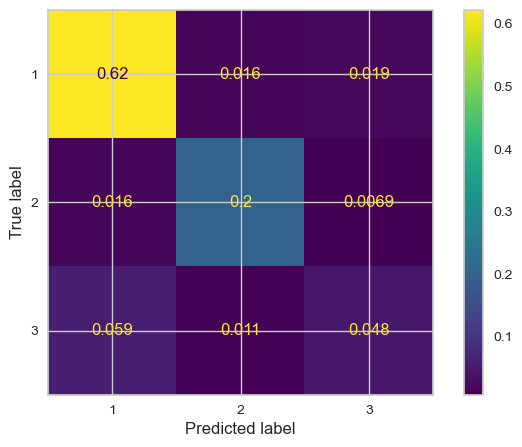

In [240]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test,normalize="all");

In [241]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[718  18  22]
 [ 18 234   8]
 [ 68  13  55]]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.88      0.90      0.89       260
           3       0.65      0.40      0.50       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2912   39   83]
 [  61  955   22]
 [ 266   60  217]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.91      0.92      0.91      1038
           3       0.67      0.40      0.50       543

    accuracy                           0.88      4615
   macro avg       0.83      0.76      0.78      4615
weighted avg       0.87      0.88      0.87      4615



#### GridSerach with weighted 

In [242]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

model = Pipeline(steps=operations)
solver = ['lbfgs']
penalty = ["l1", "l2", 'elasticnet']
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100]

class_weight = ['balanced', {1:1, 2:2, 3:4}]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver" : solver,
             "logistic__class_weight" : class_weight}

In [243]:
grid_model_w = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [244]:
grid_model_w.fit(X_train,y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100],
                         'logistic__class_weight': ['balanced',
                                                    {1: 1, 2: 2, 3: 4}],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs']},
             return_train_score=True, scoring='f1_macro')

In [245]:
grid_model_w.best_params_

{'logistic__C': 1,
 'logistic__class_weight': {1: 1, 2: 2, 3: 4},
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [246]:
pd.DataFrame(grid_model_w.cv_results_).loc[grid_model_w.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.771
mean_train_score   0.788
Name: 16, dtype: object

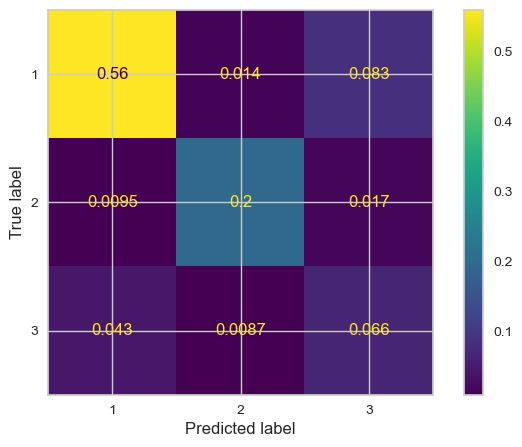

In [247]:
ConfusionMatrixDisplay.from_estimator(grid_model_w, X_test, y_test,normalize="all");

In [248]:
eval_metric(grid_model_w, X_train, y_train, X_test, y_test)

Test_Set
[[646  16  96]
 [ 11 229  20]
 [ 50  10  76]]
              precision    recall  f1-score   support

           1       0.91      0.85      0.88       758
           2       0.90      0.88      0.89       260
           3       0.40      0.56      0.46       136

    accuracy                           0.82      1154
   macro avg       0.74      0.76      0.74      1154
weighted avg       0.85      0.82      0.83      1154


Train_Set
[[2633   47  354]
 [  34  935   69]
 [ 128   43  372]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      3034
           2       0.91      0.90      0.91      1038
           3       0.47      0.69      0.56       543

    accuracy                           0.85      4615
   macro avg       0.77      0.82      0.79      4615
weighted avg       0.88      0.85      0.86      4615



#### GridSearch for choose make scorer and targetting label 3

In [249]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression()),
]

model = Pipeline(steps=operations)
solver = ['lbfgs']
penalty = ["l1", "l2", 'elasticnet']
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100]

class_weight = ['balanced', {1:1, 2:2, 3:4}]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__solver" : solver,
             "logistic__class_weight" : class_weight}

#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])

scoring = f1_3 #GridSearch allows only one score search 

In [250]:
grid_model_targeted = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = scoring,
    cv = 5,
    n_jobs = -1,
    return_train_score = True,
)

In [251]:
grid_model_targeted.fit(X_train,y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100],
                         'logistic__class_weight': ['balanced',
                                                    {1: 1, 2: 2, 3: 4}],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [252]:
grid_model_targeted.best_params_

{'logistic__C': 1,
 'logistic__class_weight': {1: 1, 2: 2, 3: 4},
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [253]:
pd.DataFrame(grid_model_targeted.cv_results_).loc[grid_model_targeted.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.524
mean_train_score   0.555
Name: 16, dtype: object

In [254]:
eval_metric(grid_model_targeted, X_train, y_train, X_test, y_test)

Test_Set
[[646  16  96]
 [ 11 229  20]
 [ 50  10  76]]
              precision    recall  f1-score   support

           1       0.91      0.85      0.88       758
           2       0.90      0.88      0.89       260
           3       0.40      0.56      0.46       136

    accuracy                           0.82      1154
   macro avg       0.74      0.76      0.74      1154
weighted avg       0.85      0.82      0.83      1154


Train_Set
[[2633   47  354]
 [  34  935   69]
 [ 128   43  372]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      3034
           2       0.91      0.90      0.91      1038
           3       0.47      0.69      0.56       543

    accuracy                           0.85      4615
   macro avg       0.77      0.82      0.79      4615
weighted avg       0.88      0.85      0.86      4615



#### Best scores and paramters if we target to maximize f1_score model

In [255]:
# {'logistic__C': 22, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression(C=22, penalty = 'l2', solver = 'lbfgs'))]

logistic_pipe_model_f = Pipeline(steps=operations).set_output(transform="pandas")

logistic_pipe_model_f.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=22))])

In [256]:
eval_metric(logistic_pipe_model_f, X_train, y_train, X_test, y_test)

Test_Set
[[718  18  22]
 [ 18 234   8]
 [ 68  13  55]]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.88      0.90      0.89       260
           3       0.65      0.40      0.50       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2912   39   83]
 [  61  955   22]
 [ 266   60  217]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.91      0.92      0.91      1038
           3       0.67      0.40      0.50       543

    accuracy                           0.88      4615
   macro avg       0.83      0.76      0.78      4615
weighted avg       0.87      0.88      0.87      4615



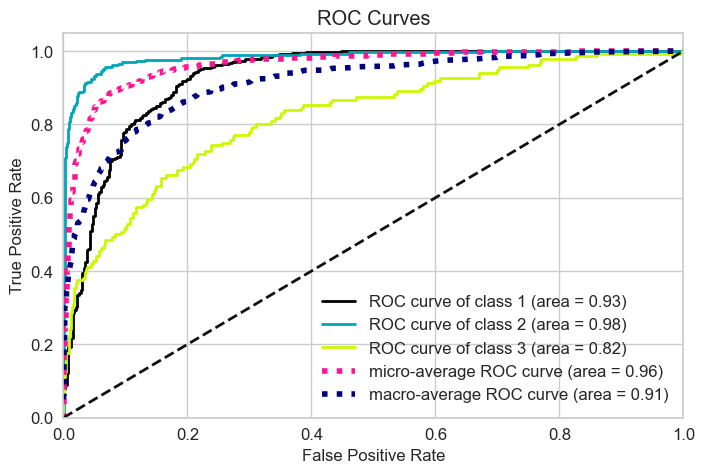

In [257]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba_l = logistic_pipe_model_f.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba_l)
plt.show();

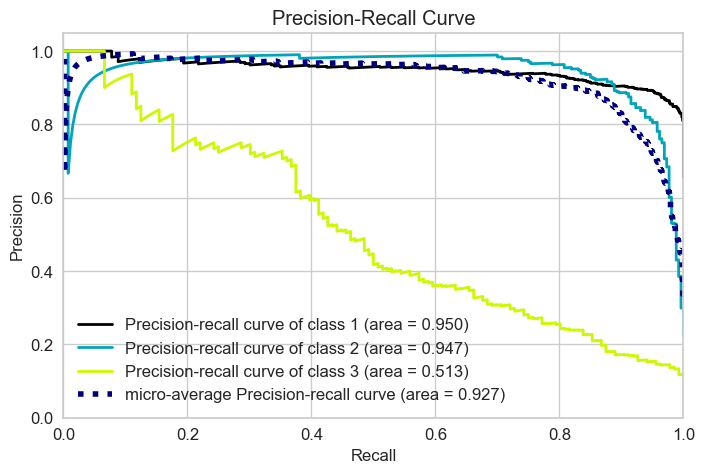

In [258]:
plot_precision_recall(y_test, y_pred_proba_l)
plt.show();

### Try to maximize recall scores

In [259]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101)),
]

logistic_pipe_model_rec = Pipeline(steps=operations).set_output(transform="pandas")

logistic_pipe_model_rec.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [260]:
eval_metric(logistic_pipe_model_rec, X_train, y_train, X_test, y_test)

Test_Set
[[614  17 127]
 [  8 234  18]
 [ 39  10  87]]
              precision    recall  f1-score   support

           1       0.93      0.81      0.87       758
           2       0.90      0.90      0.90       260
           3       0.38      0.64      0.47       136

    accuracy                           0.81      1154
   macro avg       0.73      0.78      0.75      1154
weighted avg       0.86      0.81      0.83      1154


Train_Set
[[2456   58  520]
 [  27  943   68]
 [  95   45  403]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.88      3034
           2       0.90      0.91      0.90      1038
           3       0.41      0.74      0.53       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615



#### Gridsearch for recall

In [265]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("logistic", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101)),
]

param_grid = {
    "logistic__C": [0.5, 1],
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "lbfgs"],
}

model_piperecall = Pipeline(steps=operations)

log_model_recall_grid = GridSearchCV(
    model,
    param_grid,
    scoring = make_scorer(recall_score, average=None, labels=[3]),
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)


In [266]:
log_model_recall_grid.fit(X_train, y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `s

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `s

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [267]:
log_model_recall_grid.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=1))])

In [268]:
eval_metric(log_model_recall_grid, X_train, y_train, X_test, y_test)

Test_Set
[[733  14  11]
 [ 22 233   5]
 [ 81  13  42]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.90      0.90      0.90       260
           3       0.72      0.31      0.43       136

    accuracy                           0.87      1154
   macro avg       0.83      0.72      0.75      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[2938   32   64]
 [  82  936   20]
 [ 311   58  174]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92      3034
           2       0.91      0.90      0.91      1038
           3       0.67      0.32      0.43       543

    accuracy                           0.88      4615
   macro avg       0.82      0.73      0.75      4615
weighted avg       0.86      0.88      0.86      4615



Still getting low scores for recall- need to change the selected feturs from the dataset

In [285]:
from sklearn.metrics import average_precision_score
y_test_dummies = pd.get_dummies(y_test).values
y_test_dummies

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [286]:
y_pred = logistic_pipe_model_rec.predict(X_test)

In [287]:
y_pred_probab = logistic_pipe_model_rec.predict_proba(X_test)

In [288]:
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])
log_AP = average_precision_score(y_test_dummies[:, 2], y_pred_probab[:, 2])

In [289]:
log_f1, log_recall, log_AP

(array([0.47282609]), array([0.63970588]), 0.5099603521352816)

## 2. SVC

In [290]:
# Gamma : This parameter decides how far the influence of a single training example reaches 
#     during transformation, which in turn affects how tightly the decision boundaries end up 
#     surrounding points in the input space. If there is a small value of gamma, points farther 
#     apart are considered similar. So more points are grouped together and have smoother decision 
#     boundaries (maybe less accurate). Larger values of gamma cause points to be closer together 
#     (may cause overfitting).
# R= 1/Gamma: big gamma --> Small R (more resctricted, overfitting)    
#            small gamma --> Big R (less resctricted, more relax, maybe underfitting)    
    
# The ‘C’ parameter: This parameter controls the amount of regularization applied to the data. 
#     Large values of C mean low regularization which in turn causes the training data to fit 
#     very well (may cause overfitting). Lower values of C mean higher regularization which 
#     causes the model to be more tolerant of errors (may lead to lower accuracy).

In [291]:
#parameters 
# SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
#     probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,
#     decision_function_shape='ovr', break_ties=False, random_state=None)

### Vanilla SVC model 

In [292]:
from sklearn.svm import SVC
svm_model = SVC(random_state=101)

In [293]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("svm", SVC(random_state=101)),
]

svm_pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

svm_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('svm', SVC(random_state=101))])

In [294]:
eval_metric(svm_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[742  11   5]
 [ 26 233   1]
 [105  15  16]]
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       758
           2       0.90      0.90      0.90       260
           3       0.73      0.12      0.20       136

    accuracy                           0.86      1154
   macro avg       0.83      0.66      0.67      1154
weighted avg       0.85      0.86      0.82      1154


Train_Set
[[3017   14    3]
 [  78  956    4]
 [ 400   43  100]]
              precision    recall  f1-score   support

           1       0.86      0.99      0.92      3034
           2       0.94      0.92      0.93      1038
           3       0.93      0.18      0.31       543

    accuracy                           0.88      4615
   macro avg       0.91      0.70      0.72      4615
weighted avg       0.89      0.88      0.85      4615



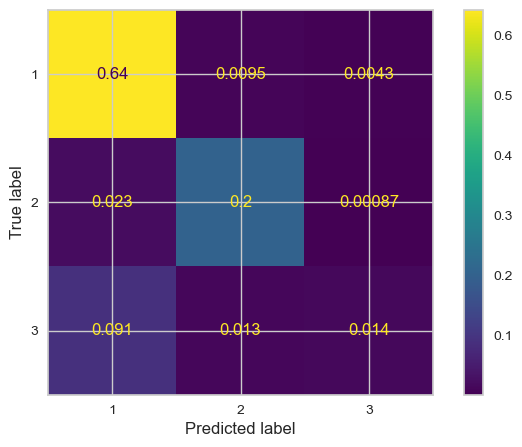

In [295]:
ConfusionMatrixDisplay.from_estimator(svm_pipe_model, X_test, y_test,normalize="all");

In [296]:
from sklearn.model_selection import cross_validate

operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("svm", SVC(random_state=101)),
]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
 
                                                            'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy           0.858
train_accuracy          0.880
test_precision_macro    0.844
train_precision_macro   0.913
test_recall_macro       0.658
train_recall_macro      0.696
test_f1_macro           0.666
train_f1_macro          0.717
dtype: float64

### chose label 3 to optimize it

In [297]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


#classes  '1, 2, 3
f1_3 = make_scorer(f1_score, average=None, labels =[3])
precision_3 = make_scorer(precision_score, average=None, labels =[3])
recall_3 = make_scorer(recall_score,  average=None, labels =[3])


scoring = {"f1_3":f1_3, 
           "precision_3":precision_3,
           "recall_3":recall_3}

In [298]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("svm", SVC(random_state=101)),
]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_3           0.193
train_f1_3          0.298
test_precision_3    0.773
train_precision_3   0.935
test_recall_3       0.112
train_recall_3      0.177
dtype: float64

In [299]:
# from scikitplot.metrics import plot_roc, precision_recall_curve
# from scikitplot.metrics import plot_precision_recall

# from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
# PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# y_pred_proba = svm_pipe_model.predict_proba(X_test)
    
# plot_roc(y_test, y_pred_proba)
# plt.show();


###  SVC Model GridsearchCV

In [300]:
from sklearn.model_selection import GridSearchCV

In [301]:
operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("SVC", SVC(probability=True, random_state=101)),
]

model = Pipeline(steps=operations)

In [302]:
#parameters to tune
# SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
#     probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,
#     decision_function_shape='ovr', break_ties=False, random_state=None)
# Big C, gamma --> more complex models (possible overfitting)

param_grid = {'SVC__C': [0.001, 0.01, 0.1, 1, 5, 10],
               'SVC__gamma': ["scale", "auto", 0.5, 1],
               'SVC__kernel': ['rbf', 'linear'],
               'SVC__class_weight': ["balanced", {1:1, 2:2, 3:4}]}

In [303]:
svm_model_grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [304]:
svm_model_grid.fit(X_train, y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'SVC__class_weight': ['balanced', {1: 1, 2: 2, 3: 4}],
                         'SVC__gamma': ['scale', 'auto', 0.5, 1],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1_macro')

In [305]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=10, class_weight={1: 1, 2: 2, 3: 4}, gamma='auto',
                     probability=True, random_state=101))])

In [306]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.777
mean_train_score   0.790
Name: 90, dtype: object

In [307]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[651  12  95]
 [ 11 232  17]
 [ 47  11  78]]
              precision    recall  f1-score   support

           1       0.92      0.86      0.89       758
           2       0.91      0.89      0.90       260
           3       0.41      0.57      0.48       136

    accuracy                           0.83      1154
   macro avg       0.75      0.77      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2648   40  346]
 [  37  932   69]
 [ 137   41  365]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      3034
           2       0.92      0.90      0.91      1038
           3       0.47      0.67      0.55       543

    accuracy                           0.85      4615
   macro avg       0.78      0.81      0.79      4615
weighted avg       0.88      0.85      0.86      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

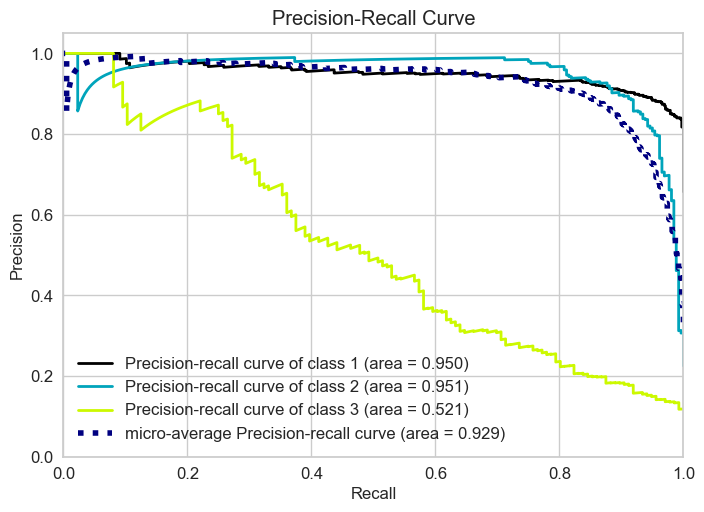

In [235]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba_svm = svm_model_grid.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba_svm)
# plt.show();


#### Gridsearch for targeting label 3

In [229]:
#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])

scoring = f1_3 #GridSearch allows only one score search 

operations = [
    ("OneHot_Encoder", column_trans_OneHot),
    ("scaler", MinMaxScaler()),
    ("SVC", SVC(probability=True, random_state=101)),
]

model = Pipeline(steps=operations)


param_grid = {'SVC__C': [5, 10, 20],
               'SVC__gamma': ["auto"],
               'SVC__kernel': ['rbf', 'linear'],
               'SVC__class_weight': ["balanced", {1:1, 2:2, 3:4}]}


svm_model_grid_target = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)



In [230]:
svm_model_grid_target.fit(X_train, y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [5, 10, 20],
                         'SVC__class_weight': ['balanced', {1: 1, 2: 2, 3: 4}],
                         'SVC__gamma': ['auto'],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [231]:
svm_model_grid_target.best_estimator_

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=10, class_weight={1: 1, 2: 2, 3: 4}, gamma='auto',
                     probability=True, random_state=101))])

In [232]:
pd.DataFrame(svm_model_grid_target.cv_results_).loc[svm_model_grid_target.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.533
mean_train_score   0.558
Name: 6, dtype: object

In [233]:
eval_metric(svm_model_grid_target, X_train, y_train, X_test, y_test)

Test_Set
[[651  12  95]
 [ 11 232  17]
 [ 47  11  78]]
              precision    recall  f1-score   support

           1       0.92      0.86      0.89       758
           2       0.91      0.89      0.90       260
           3       0.41      0.57      0.48       136

    accuracy                           0.83      1154
   macro avg       0.75      0.77      0.76      1154
weighted avg       0.86      0.83      0.84      1154


Train_Set
[[2648   40  346]
 [  37  932   69]
 [ 137   41  365]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      3034
           2       0.92      0.90      0.91      1038
           3       0.47      0.67      0.55       543

    accuracy                           0.85      4615
   macro avg       0.78      0.81      0.79      4615
weighted avg       0.88      0.85      0.86      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

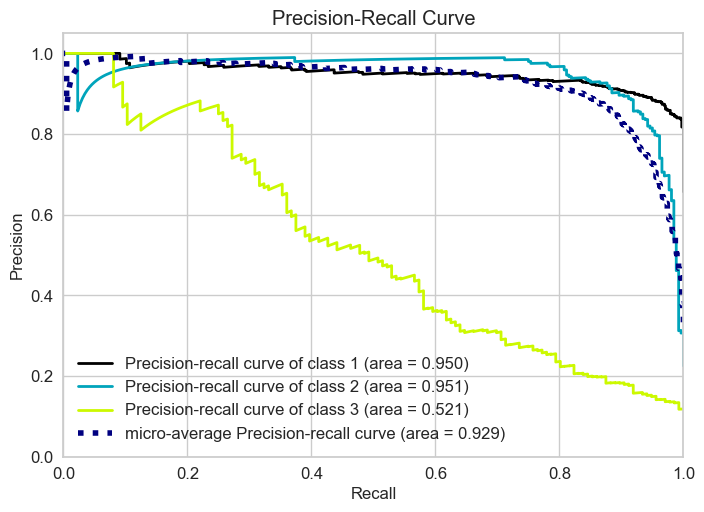

In [234]:
y_pred_proba_svm_t = svm_model_grid_target.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba_svm_t)

### Save the results 

In [328]:
# targetted grid search does not make any difference 
# name : svm_model_grid

y_pred_svm_model = svm_model_grid.predict(X_test)
y_pred_probab_svm_model = svm_model_grid.predict_proba(X_test) # use decision function not this later 
svm_f1 = f1_score(y_test, y_pred_svm_model, average=None, labels=[3])
svm_recall = recall_score(y_test, y_pred_svm_model, average=None, labels=[3])
svm_AP = average_precision_score(y_test_dummies[:, 2], y_pred_probab_svm_model[:, 2])
svm_f1, svm_recall, svm_AP


(array([0.47852761]), array([0.57352941]), 0.5213535547051161)

## 3. RF

### Vanilla RF Model

In [239]:
# parameters 
# RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
#                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#                        verbose=0, warm_start=False, 
#                        class_weight=None, ccp_alpha=0.0, max_samples=None)

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("RF_model", RandomForestClassifier(random_state=101)),
]

RF_pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [242]:
eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test) #overfitting

Test_Set
[[738  18   2]
 [ 69 189   2]
 [113  14   9]]
              precision    recall  f1-score   support

           1       0.80      0.97      0.88       758
           2       0.86      0.73      0.79       260
           3       0.69      0.07      0.12       136

    accuracy                           0.81      1154
   macro avg       0.78      0.59      0.60      1154
weighted avg       0.80      0.81      0.77      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### RF Crossvalidate

In [243]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("RF_model", RandomForestClassifier(random_state=101)),
]

RF_pipe_model_cross = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(RF_pipe_model_cross, 
                        X_train, 
                        y_train, 
                        scoring=["accuracy", 
                                 "precision_macro", 
                                 "recall_macro", 
                                 "f1_macro"], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy           0.817
train_accuracy          1.000
test_precision_macro    0.766
train_precision_macro   1.000
test_recall_macro       0.596
train_recall_macro      1.000
test_f1_macro           0.603
train_f1_macro          1.000
dtype: float64

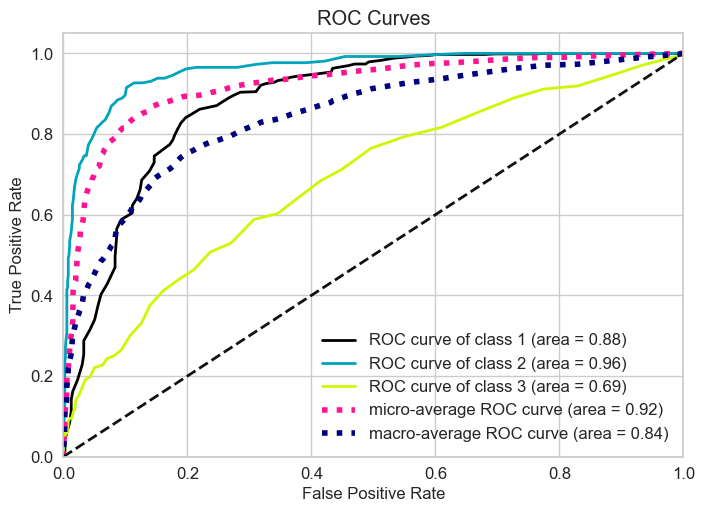

In [244]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe_rf = RF_pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe_rf)
plt.show();
#unbalanced not informative

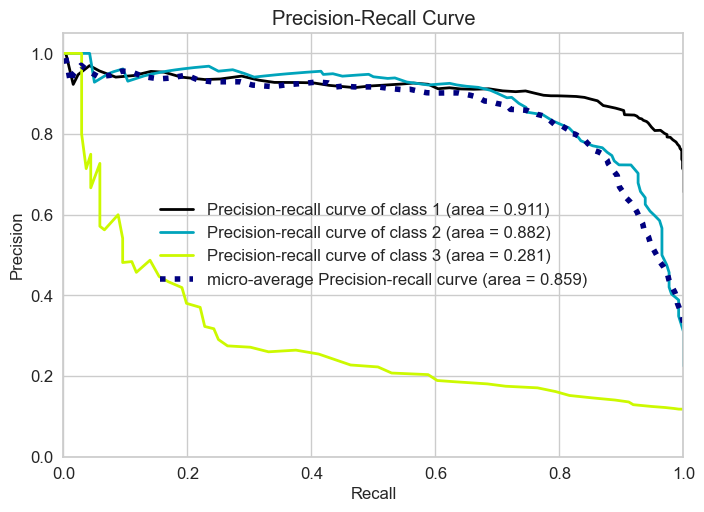

In [252]:
plot_precision_recall(y_test, y_pred_probe_rf);

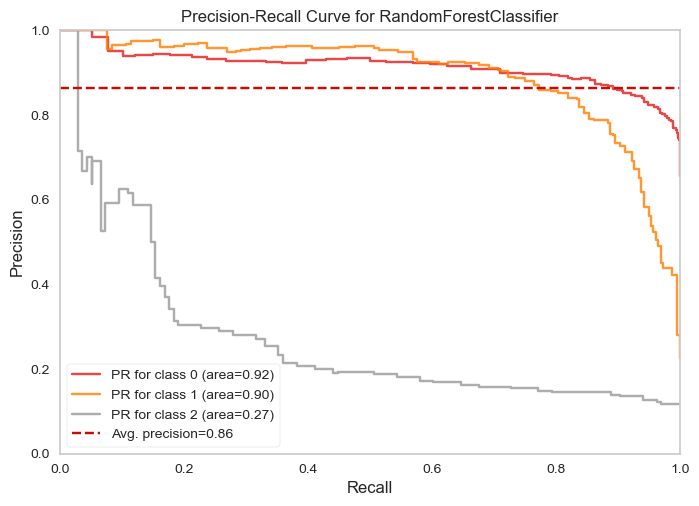

In [253]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(random_state=101),
    per_class=True,
    cmap="Set1"
)

viz.fit(X_train_Ord_Scaled, y_train)
viz.score(X_test_Ord_Scaled, y_test)
viz.show();
#why results are a bit different?

In [251]:
# # although this can be done in single pipeline just for test 
# X_train_trans_t = RF_pipe_model['Ordinal_Encoder'].fit_transform(X_train)
# X_test_trans_t = RF_pipe_model['Ordinal_Encoder'].transform(X_test)

# X_train_trans_scla_t = RF_pipe_model['scaler'].fit_transform(X_train_trans_t)
# X_test_trans_scla_t = RF_pipe_model['scaler'].transform(X_test_trans_t)

# from yellowbrick.classifier import PrecisionRecallCurve

# viz = PrecisionRecallCurve(
#     RandomForestClassifier(random_state=101),
#     per_class=True,
#     cmap="Set1"
# )

# viz.fit(X_train_trans_scla_t, y_train)
# viz.score(X_test_trans_scla_t, y_test)
# viz.show()

### RF Model GridsearchCV

In [254]:
from sklearn.model_selection import GridSearchCV

In [256]:
# parameters to tune
# RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
#                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#                        verbose=0, warm_start=False, 
#                        class_weight=None, ccp_alpha=0.0, max_samples=None)

In [258]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("RF_model", RandomForestClassifier(random_state=101)),
]

RF_pipe_model_grid = Pipeline(steps=operations).set_output(transform="pandas")

In [259]:
param_grid = {'RF_model__n_estimators':[50, 75, 200],
              'RF_model__max_features':[5, 'sqrt'],
              'RF_model__max_depth':[2, 3, 4],
              'RF_model__min_samples_split':[2, 3, 4],
              'RF_model__min_samples_leaf': [2, 3, 4],
              'RF_model__max_samples':[0.5, 0.8],
              'RF_model__criterion':['gini', 'entropy', 'log_loss'],
              'RF_model__class_weight': ['balanced', 'balanced_subsample', [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}]]} 

# {1:1, 2:2, 3:4} previous weight notation

In [260]:
RF_model_grid = GridSearchCV(
    estimator=RF_pipe_model_grid,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [261]:
RF_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=...
                                                    'balanced_subsample',
                                                    [{0: 1, 1: 1}, {0: 1, 1: 2},
                                                     {0: 1, 1: 4}]],
                         'RF_model__criterion': ['gini', 'entropy', 'log_loss'],
                         'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [5, 'sqrt'],
                         'RF_model__max_samples': [0.5, 0.8],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 75, 200]},
             return_train_score=True, scoring='f1_macro')

In [262]:
RF_model_grid.best_estimator_

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=4, max_samples=0.5,
                                        min_samples_leaf=4, n_estimators=200,
                                        random_state=101))])

In [263]:
pd.DataFrame(RF_model_grid.cv_results_).loc[RF_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.595
mean_train_score   0.628
Name: 1262, dtype: object

In [264]:
eval_metric(RF_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[429  62 267]
 [ 18 201  41]
 [ 40  21  75]]
              precision    recall  f1-score   support

           1       0.88      0.57      0.69       758
           2       0.71      0.77      0.74       260
           3       0.20      0.55      0.29       136

    accuracy                           0.61      1154
   macro avg       0.59      0.63      0.57      1154
weighted avg       0.76      0.61      0.65      1154


Train_Set
[[1857  251  926]
 [  90  826  122]
 [ 130   44  369]]
              precision    recall  f1-score   support

           1       0.89      0.61      0.73      3034
           2       0.74      0.80      0.77      1038
           3       0.26      0.68      0.38       543

    accuracy                           0.66      4615
   macro avg       0.63      0.70      0.62      4615
weighted avg       0.78      0.66      0.69      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

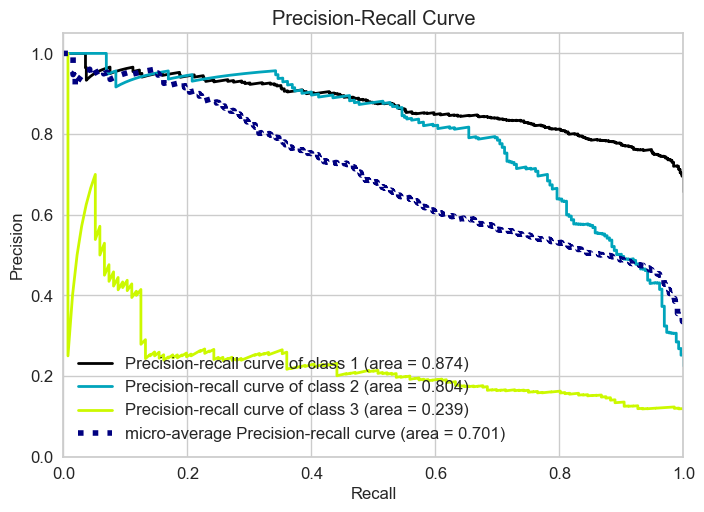

In [267]:
y_pred_proba_RF = RF_model_grid.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba_RF)

#### Choose target 3 to optimize 

In [311]:
#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])

scoring = f1_3 #GridSearch allows only one score search 

operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("RF_model", RandomForestClassifier(random_state=101)),
]


model = Pipeline(steps=operations)


param_grid = {'RF_model__n_estimators':[200],
              'RF_model__max_features':[5, 'sqrt'],
              'RF_model__max_depth':[4],
              'RF_model__min_samples_split':[4],
              'RF_model__min_samples_leaf': [4],
              'RF_model__max_samples':[0.5],
              'RF_model__criterion':['gini'],
              'RF_model__class_weight': ['balanced', 'balanced_subsample', [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}]]} 


RF_model_grid_target = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)


In [312]:
RF_model_grid_target.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=...
                                                    'balanced_subsample',
                                                    [{0: 1, 1: 1}, {0: 1, 1: 2},
                                                     {0: 1, 1: 4}]],
                         'RF_model__criterion': ['gini'],
                         'RF_model__max_depth': [4],
                         'RF_model__max_features': [5, 'sqrt'],
                         'RF_model__max_samples': [0.5],
                         'RF_model__min_samples_leaf': [4],
                         'RF_model__min_samples_split': [4],
                         'RF_model__n_estimators': [200]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [313]:
RF_model_grid_target.best_estimator_

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        max_samples=0.5, min_samples_leaf=4,
                                        min_samples_split=4, n_estimators=200,
                                        random_state=101))])

In [314]:
pd.DataFrame(RF_model_grid_target.cv_results_).loc[RF_model_grid_target.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.337
mean_train_score   0.382
Name: 1, dtype: object

In [315]:
eval_metric(RF_model_grid_target, X_train, y_train, X_test, y_test)

Test_Set
[[420  65 273]
 [ 20 199  41]
 [ 40  20  76]]
              precision    recall  f1-score   support

           1       0.88      0.55      0.68       758
           2       0.70      0.77      0.73       260
           3       0.19      0.56      0.29       136

    accuracy                           0.60      1154
   macro avg       0.59      0.63      0.57      1154
weighted avg       0.76      0.60      0.64      1154


Train_Set
[[1846  255  933]
 [  85  824  129]
 [ 124   46  373]]
              precision    recall  f1-score   support

           1       0.90      0.61      0.73      3034
           2       0.73      0.79      0.76      1038
           3       0.26      0.69      0.38       543

    accuracy                           0.66      4615
   macro avg       0.63      0.70      0.62      4615
weighted avg       0.79      0.66      0.69      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

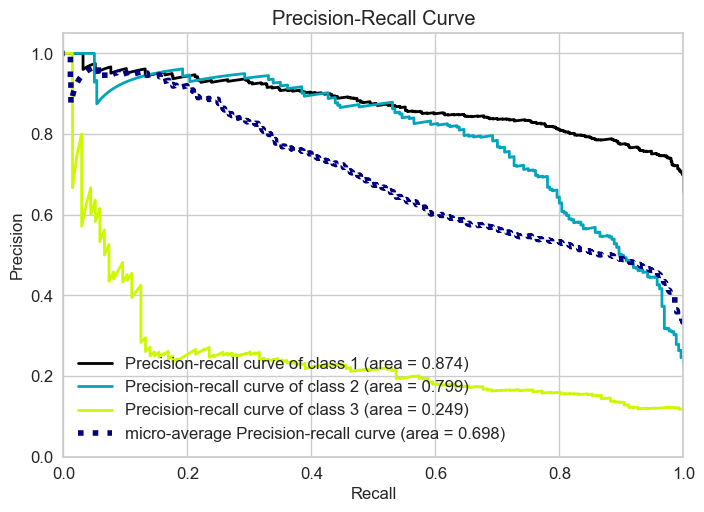

In [273]:
y_pred_proba_RF_t = RF_model_grid_target.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba_RF_t)

### Chose the targetted labeled parameters 

In [316]:
y_pred_RF_model = RF_model_grid_target.predict(X_test)
y_pred_probab_RF_model = RF_model_grid_target.predict_proba(X_test)
RF_f1 = f1_score(y_test, y_pred_RF_model, average=None, labels=[3])
RF_recall = recall_score(y_test, y_pred_RF_model, average=None, labels=[3])
RF_AP = average_precision_score(y_test_dummies[:, 2], y_pred_probab_RF_model[:, 2])
RF_f1, RF_recall, RF_AP

(array([0.28897338]), array([0.55882353]), 0.24895377455303658)

## 4. XGBoost

### Vanilla XGBoost Model

In [317]:
from xgboost import XGBClassifier

In [318]:
y_train_XG = y_train.map({1:0,2:1,3:2})
y_test_XG = y_test.map({1:0,2:1,3:2})

In [281]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("XGB_model", XGBClassifier(random_state=101)),
]

XGBoost_pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

XGBoost_pipe_model.fit(X_train, y_train_XG)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [282]:
eval_metric(XGBoost_pipe_model, X_train, y_train_XG, X_test, y_test_XG)

Test_Set
[[725  17  16]
 [ 27 228   5]
 [ 93  14  29]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       758
           1       0.88      0.88      0.88       260
           2       0.58      0.21      0.31       136

    accuracy                           0.85      1154
   macro avg       0.77      0.68      0.70      1154
weighted avg       0.83      0.85      0.83      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### Crossvalidate

In [284]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("XGB_model", XGBClassifier(random_state=101)),
]


XGB_pipe_model_cross = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(XGB_pipe_model_cross, 
                        X_train, 
                        y_train_XG, 
                        scoring=["accuracy", 
                                 "precision_macro", 
                                 "recall_macro", 
                                 "f1_macro"], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.852
train_accuracy          1.000
test_precision_macro    0.789
train_precision_macro   1.000
test_recall_macro       0.680
train_recall_macro      1.000
test_f1_macro           0.701
train_f1_macro          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [294]:
operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("XGB_model", XGBClassifier(random_state=101)),
]


XGB_pipe_model_grid = Pipeline(steps=operations).set_output(transform="pandas")

In [295]:
param_grid = {
    "XGB_model__n_estimators": [50, 100, 200],
    "XGB_model__max_depth": [2,3,4],
    "XGB_model__learning_rate": [0.1, 0.2, 0.3],
    "XGB_model__subsample": [0.5, 1],
    "XGB_model__colsample_bytree": [0.5, 0.7, 1],
    "XGB_model__reg_alpha": [0, 0.5],
    "XGB_model__reg_lambda": [1, 0.5],
    "XGB_model__colsample_bytree": [0.5, 0.7, 1]
}

In [286]:
# param_grid = {
#     "XGB_model__reg_alpha": [0, 0.5],
#     "XGB_model__reg_lambda": [1, 0.5],
# }

In [296]:
RF_model_grid = GridSearchCV(
    estimator=XGB_pipe_model_grid,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [297]:
XGB_pipe_model_grid.fit(X_train, y_train_XG)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [298]:
eval_metric(XGB_pipe_model_grid, X_train, y_train_XG, X_test, y_test_XG)

Test_Set
[[725  17  16]
 [ 27 228   5]
 [ 93  14  29]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       758
           1       0.88      0.88      0.88       260
           2       0.58      0.21      0.31       136

    accuracy                           0.85      1154
   macro avg       0.77      0.68      0.70      1154
weighted avg       0.83      0.85      0.83      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

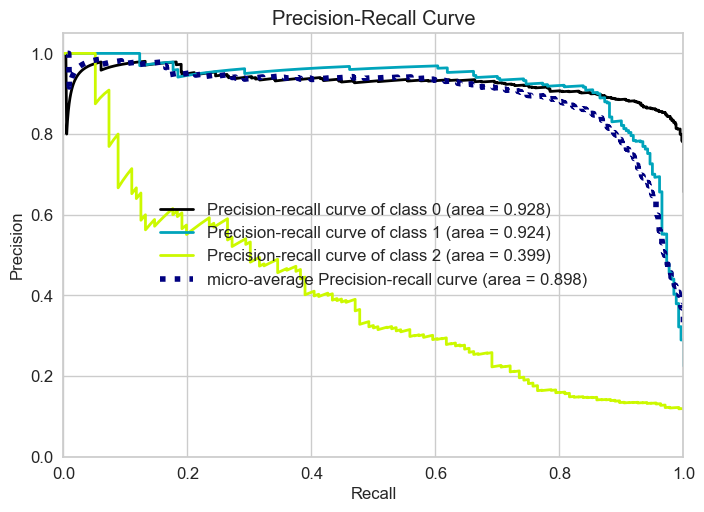

In [299]:
y_pred_proba_XGB = XGB_pipe_model_grid.predict_proba(X_test)
    
plot_precision_recall(y_test_XG, y_pred_proba_XGB)

#### Gridsearch for scoring for target label 3 (now 2)

In [319]:
#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])

scoring = f1_3 #GridSearch allows only one score search 


operations = [
    ("Ordinal_Encoder", column_trans_Ord),
    ("scaler", MinMaxScaler()),
    ("XGB_model", XGBClassifier(random_state=101)),
]


XGB_pipe_model_grid_tar = Pipeline(steps=operations).set_output(transform="pandas")


param_grid = {
    "XGB_model__n_estimators": [50, 100, 200],
    "XGB_model__max_depth": [2,3,4],
    "XGB_model__learning_rate": [0.1, 0.2, 0.3],
    "XGB_model__subsample": [0.5, 1],
    "XGB_model__colsample_bytree": [0.5, 0.7, 1],
    "XGB_model__reg_alpha": [0, 0.5],
    "XGB_model__reg_lambda": [1, 0.5],
    "XGB_model__colsample_bytree": [0.5, 0.7, 1]
}


In [320]:
XGB_pipe_model_grid_target = GridSearchCV(
    estimator=XGB_pipe_model_grid_tar,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [321]:
XGB_pipe_model_grid_target.fit(X_train, y_train_XG)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbac...
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 1],
                         'XGB_model__learning_rate': [0.1, 0.2, 0.3],
                         'XGB_model__max_depth': [2, 3, 4],
                         'XGB_model__n_estimators': [50, 100, 200],
                         'XGB_model__reg_alpha': [0, 0.5],
                         'XGB_model__reg_lambda': [1, 0.5],
                         'XGB_model__subsample': [0.5, 1]},
             return_train_score=True, scoring='f1_macro')

In [322]:
eval_metric(XGB_pipe_model_grid_target, X_train, y_train_XG, X_test, y_test_XG)

Test_Set
[[722  15  21]
 [ 25 231   4]
 [ 85  15  36]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       758
           1       0.89      0.89      0.89       260
           2       0.59      0.26      0.37       136

    accuracy                           0.86      1154
   macro avg       0.78      0.70      0.72      1154
weighted avg       0.84      0.86      0.84      1154


Train_Set
[[3025    4    5]
 [  15 1022    1]
 [  69    8  466]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3034
           1       0.99      0.98      0.99      1038
           2       0.99      0.86      0.92       543

    accuracy                           0.98      4615
   macro avg       0.98      0.95      0.96      4615
weighted avg       0.98      0.98      0.98      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

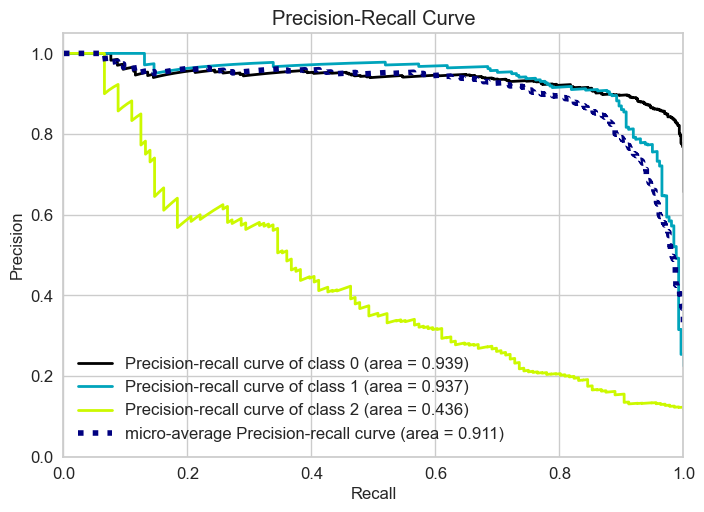

In [394]:
y_pred_proba_XGB_t = XGB_pipe_model_grid_target.predict_proba(X_test)
    
plot_precision_recall(y_test_XG, y_pred_proba_XGB_t)

### Save the best results (choose targetted gridsearch)

In [326]:
y_test_dummies_XG = pd.get_dummies(y_test_XG).values
y_test_dummies_XG

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [327]:
y_pred_XGB_model = XGB_pipe_model_grid_target.predict(X_test)
y_pred_probab_XGB_model = XGB_pipe_model_grid_target.predict_proba(X_test)
XGB_f1 = f1_score(y_test_XG, y_pred_XGB_model, average=None, labels=[2])
XGB_recall = recall_score(y_test_XG, y_pred_XGB_model, average=None, labels=[2])
XGB_AP = average_precision_score(y_test_dummies_XG[:, 2], y_pred_probab_XGB_model[:, 2])
XGB_f1, XGB_recall, XGB_AP

(array([0.36548223]), array([0.26470588]), 0.4359113123248036)

## Compare Models

In [330]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svm_f1[0], RF_f1[0], XGB_f1[0]],
        "Recall": [log_recall[0], svm_recall[0], RF_recall[0], XGB_recall[0]],
        "AP": [log_AP, svm_AP, RF_AP, XGB_AP],
    }
)

compare


Model    F1  Recall    AP
0  Logistic Regression 0.473   0.640 0.510
1                  SVM 0.479   0.574 0.521
2        Random Forest 0.289   0.559 0.249
3              XGBoost 0.365   0.265 0.436

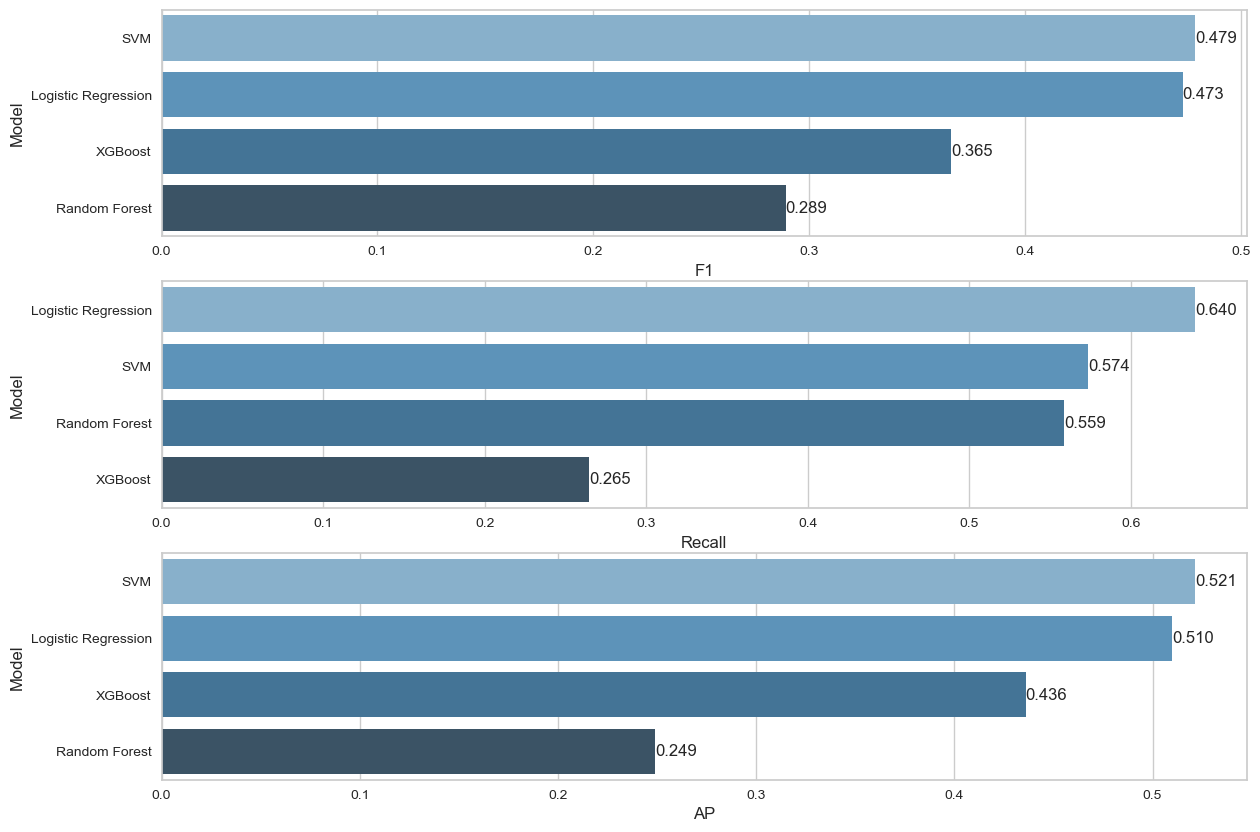

In [331]:
plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

Logistic has highest recall. Continue with Logistic which is fast and more explaniable

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

This dataset is unbalanced (class 3 is undersampled). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting.

There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

##  Smote implement

In [305]:
#pip install imblearn

In [317]:
#SMOTE Syntax
#SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)[source]
#When sampling_strategy=dict, the keys correspond to the targeted classes. The values correspond to the desired number of samples for each targeted class.

In [333]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [334]:
X = df_C.drop(["DODRace"], axis=1)
y = df_C["DODRace"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state=42)

In [335]:
X_train.shape, X_test.shape

((4615, 96), (1154, 96))

In [336]:
y.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [337]:
y_train.value_counts()

1    3034
2    1038
3     543
Name: DODRace, dtype: int64

### Encode and Scale data 

In [338]:
cat_onehot = ['Gender','Branch']  # will be used distance based algorithms 
cat_ordinal = ['Gender','Branch'] # will be used tree based algorithms (although there is no logical order)

#OneHot
column_trans_OneHot = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans_OneHot = column_trans_OneHot.set_output(transform="pandas")

#Ordinal

column_trans_Ord = make_column_transformer(
    (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
) 

column_trans_Ord = column_trans_Ord.set_output(transform="pandas")


In [339]:
X_train_OneHot_trans = column_trans_OneHot.fit_transform(X_train)
X_test_OneHot_trans = column_trans_OneHot.transform(X_test)

X_train_Ord_trans = column_trans_Ord.fit_transform(X_train)
X_test_Ord_trans = column_trans_Ord.transform(X_test)

scaler_OneHot = MinMaxScaler()

X_train_OneHot_Scaled = scaler_OneHot.fit_transform(X_train_OneHot_trans) #encoded and transformed 
X_test_OneHot_Scaled = scaler_OneHot.transform(X_test_OneHot_trans) #encoded and transformed 

X_train_Ord_Scaled = scaler_Ord.fit_transform(X_train_Ord_trans) #encoded and transformed 
X_test_Ord_Scaled = scaler_Ord.transform(X_test_Ord_trans) #encoded and transformed 

In [346]:
under_clas_1 = RandomUnderSampler(sampling_strategy = {1: 2000})
over_clas_2 = SMOTE(sampling_strategy = {2: 2000})
over_clas_3 = SMOTE(sampling_strategy = {3: 2000})
steps = [('u', under_clas_1), ('o_clas_1', over_clas_2), ('o_clas_3', over_clas_3)]
pipeline = imbpipeline(steps = steps)
X_train_OHot_S, y_train_OHot_S = pipeline.fit_resample(X_train_OneHot_Scaled, y_train)

In [341]:
X_train_OHot_S.shape, y_train_OHot_S.shape

((7500, 99), (7500,))

In [342]:
X_train_Ord_S, y_train_Ord_S = pipeline.fit_resample(X_train_Ord_Scaled, y_train)

In [343]:
X_train_Ord_S.shape, y_train_Ord_S.shape

((7500, 96), (7500,))

## Logistic Regression Over/ Under Sampling

In [365]:
from sklearn.linear_model import LogisticRegression

logistic_s = LogisticRegression()

#### Combine scaling and transferring 

In [344]:
column_trans_OneHot = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder = MinMaxScaler(),
    verbose_feature_names_out=False,
)  

In [347]:
operations = [
    ("OneHotEncoder", column_trans_OneHot),
    ('u', under_clas_1), 
    ('o_clas_1', over_clas_2),
    ('o_clas_3', over_clas_3),
    ("logistic", LogisticRegression(max_iter=10000, random_state=101)),
]

In [350]:
smote_pipeline_logistic = imbpipeline(steps=operations)

In [351]:
smote_pipeline_logistic.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('u', RandomUnderSampler(sampling_strategy={1: 2000})),
                ('o_clas_1', SMOTE(sampling_strategy={2: 2000})),
                ('o_clas_3', SMOTE(sampling_strategy={3: 2000})),
                ('logistic',
                 LogisticRegression(max_iter=10000, random_state=101))])

In [352]:
eval_metric(smote_pipeline_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[608  18 132]
 [  9 234  17]
 [ 41  11  84]]
              precision    recall  f1-score   support

           1       0.92      0.80      0.86       758
           2       0.89      0.90      0.89       260
           3       0.36      0.62      0.46       136

    accuracy                           0.80      1154
   macro avg       0.72      0.77      0.74      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[2472   61  501]
 [  26  946   66]
 [ 106   48  389]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.88      3034
           2       0.90      0.91      0.90      1038
           3       0.41      0.72      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.77      4615
weighted avg       0.87      0.82      0.84      4615



In [353]:
from sklearn.model_selection import cross_validate

logistic_s_model = imbpipeline(steps=operations)


scores = cross_validate(logistic_s_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
 
                                                            'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:,2:]

test_accuracy  train_accuracy  test_precision_macro  \
1           0.794           0.833                 0.706   
2           0.818           0.822                 0.745   
3           0.827           0.828                 0.746   
4           0.818           0.822                 0.752   
5           0.823           0.824                 0.760   
6           0.826           0.828                 0.736   
7           0.774           0.832                 0.703   
8           0.829           0.819                 0.757   
9           0.837           0.822                 0.758   
10          0.811           0.826                 0.739   

    train_precision_macro  test_recall_macro  train_recall_macro  \
1                   0.760              0.743               0.823   
2                   0.750              0.806               0.814   
3                   0.753              0.787               0.817   
4                   0.750              0.834               0.811   
5                   0.749              0.822               0.809   
6                   0.755              0.776               0.820   
7                   0.758              0.761               0.822   
8                   0.749              0.823               0.817   
9                   0.750              0.810               0.813   
10                  0.752              0.800               0.815   

    test_f1_macro  train_f1_macro  
1           0.712           0.776  
2           0.760           0.765  
3           0.757           0.770  
4           0.770           0.764  
5           0.771           0.764  
6           0.749           0.771  
7           0.710           0.775  
8           0.772           0.764  
9           0.774           0.764  
10          0.754           0.767

In [361]:
df_scores.iloc[:,2:].mean()

test_f1_3           0.497
train_f1_3          0.524
test_precision_3    0.389
train_precision_3   0.410
test_recall_3       0.690
train_recall_3      0.727
dtype: float64

In [354]:
#check how bad 3 class
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


#classes  '1, 2, 3 choose 3 vs rest
f1_3 = make_scorer(f1_score, average=None, labels =[3])
precision_3 = make_scorer(precision_score, average=None, labels =[3])
recall_3 = make_scorer(recall_score,  average=None, labels =[3])


scoring = {"f1_3":f1_3, 
           "precision_3":precision_3,
           "recall_3":recall_3}

logistic_s_model_target = imbpipeline(steps=operations)


scores = cross_validate(logistic_s_model_target, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_3           0.497
train_f1_3          0.524
test_precision_3    0.389
train_precision_3   0.410
test_recall_3       0.690
train_recall_3      0.727
dtype: float64

#### GridSearch targetted

In [358]:
operations = [
    ("OneHotEncoder", column_trans_OneHot),
    ('u', under_clas_1), 
    ('o_clas_1', over_clas_2),
    ('o_clas_3', over_clas_3),
    ("logistic", LogisticRegression(max_iter=10000, random_state=101)),
]

smote_pipeline_logistic_grid = imbpipeline(steps=operations)


solver = ['lbfgs']
penalty = ["l1", "l2", 'elasticnet']
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__solver" : solver}

# #classes  '1, 2, 3 choose 3 vs rest
# f1_3 = make_scorer(f1_score, average=None, labels =[3])
# scoring = f1_3 #GridSearch allows only one score search 

In [359]:

locistic_s_model_grid = GridSearchCV(
    estimator = smote_pipeline_logistic_grid,
    param_grid = param_grid,
    scoring = make_scorer(recall_score,  average=None, labels =[3]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [360]:
locistic_s_model_grid.fit(X_train, y_train)

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Branch'])],
                                                          verbose_feature_names_out=False)),
                                       ('u',
                                        RandomUnderSampler(sampling_strategy={1: 2000})),
                                       ('o_clas_1',
                                        SMOTE(sampling_strategy={2: 2000})),
                                       ('o_clas_3',
                                        SMOTE(sampling_strategy={3: 2000})),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25, 100],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [362]:
locistic_s_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Branch'])],
                                   verbose_feature_names_out=False)),
                ('u', RandomUnderSampler(sampling_strategy={1: 2000})),
                ('o_clas_1', SMOTE(sampling_strategy={2: 2000})),
                ('o_clas_3', SMOTE(sampling_strategy={3: 2000})),
                ('logistic',
                 LogisticRegression(C=1, max_iter=10000, random_state=101))])

In [363]:
pd.DataFrame(locistic_s_model_grid.cv_results_).loc[locistic_s_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.696
mean_train_score   0.725
Name: 7, dtype: object

In [364]:
eval_metric(locistic_s_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[608  19 131]
 [ 10 234  16]
 [ 38  12  86]]
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       758
           2       0.88      0.90      0.89       260
           3       0.37      0.63      0.47       136

    accuracy                           0.80      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[2470   61  503]
 [  26  951   61]
 [ 100   48  395]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.88      3034
           2       0.90      0.92      0.91      1038
           3       0.41      0.73      0.53       543

    accuracy                           0.83      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.83      0.84      4615



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

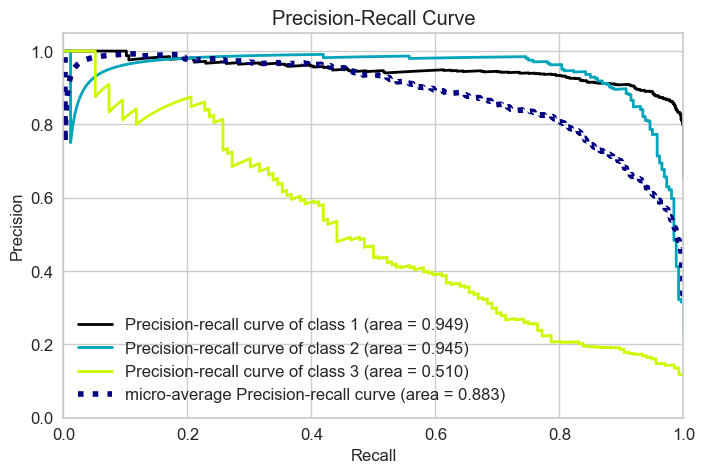

In [365]:
y_pred_proba_logistic_s = locistic_s_model_grid.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba_logistic_s)

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [369]:
from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef?

In [370]:
ypred_log_grid = locistic_s_model_grid.predict(X_test)

In [371]:
matthews_corrcoef(y_test, ypred_log_grid)

0.6552069218261456

In [372]:
from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score?

In [373]:
#0.7376215262514891 solution score
cohen_kappa_score(y_test, ypred_log_grid)

0.6446230991442743

# SHAP

In [375]:
# pip install shap

In [376]:
import numpy

numpy.__version__

'1.23.5'

In [377]:
import shap
# shap asks for numpy 1.24 or lower.

In [535]:
column_trans_OneHot_SHAP = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder = MinMaxScaler(),
    verbose_feature_names_out=False,
).set_output(transform="pandas")


X_train_trans = column_trans_OneHot_SHAP.fit_transform(X_train)
X_test_trans = column_trans_OneHot_SHAP.transform(X_test)

In [380]:
#Shap doesn't work with the model fitted with pipeline!!!
model_SHAP = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_SHAP.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [381]:
eval_metric(model_SHAP, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[610  16 132]
 [  8 231  21]
 [ 43  10  83]]
              precision    recall  f1-score   support

           1       0.92      0.80      0.86       758
           2       0.90      0.89      0.89       260
           3       0.35      0.61      0.45       136

    accuracy                           0.80      1154
   macro avg       0.72      0.77      0.73      1154
weighted avg       0.85      0.80      0.82      1154


Train_Set
[[2454   51  529]
 [  28  946   64]
 [  96   45  402]]
              precision    recall  f1-score   support

           1       0.95      0.81      0.87      3034
           2       0.91      0.91      0.91      1038
           3       0.40      0.74      0.52       543

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615



In [382]:
operations = [
    ("OneHotEncoder", column_trans_OneHot_SHAP),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/pmzms1/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in 

test_f1_3           0.491
train_f1_3          0.527
test_precision_3    0.377
train_precision_3   0.407
test_recall_3       0.703
train_recall_3      0.745
dtype: float64

Not very good model and not very consistent! Check the feature selection!

In [383]:
features = column_trans_OneHot_SHAP.get_feature_names_out()
features

array(['Gender_Female', 'Gender_Male', 'Branch_Combat Arms',
       'Branch_Combat Service Support', 'Branch_Combat Support',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplen

## SHAP Values

In [385]:
# shap.explainers.Linear(model, masker, link=CPUDispatcher(<function identity>),
#                        nsamples=1000, feature_perturbation=None, **kwargs)

import shap

# explainer = shap.LinearExplainer(model_SHAP, X_train_trans)  # LinearExplainer

# shap_values = explainer.shap_values(X_test_trans)

# shap.summary_plot(
#     shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
# )


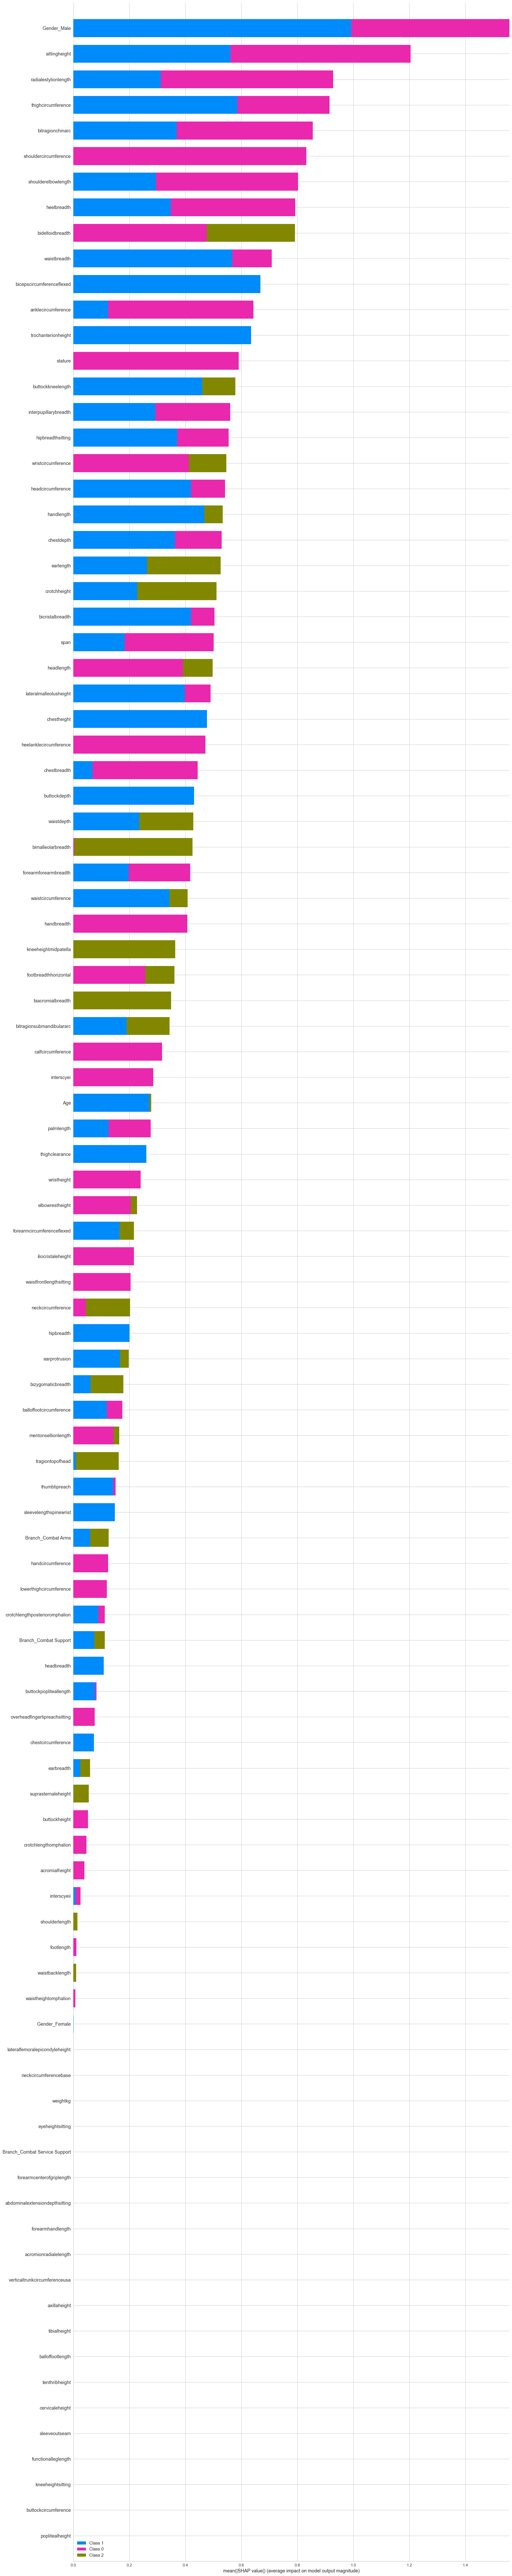

In [387]:
explainer = shap.Explainer(model_SHAP, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


In [388]:
# label 2 (hispanic) is not predicted good, choose features to predict it better

In [609]:
hispanic_label3 = [
    "bimalleolarbreadth",
    "buttockheight",
    "headlength",
    "earlength",
    'crotchheight',
    "handlength",
    "waistdepth",
    "bimalleolarbreadth",
    'waistcircumference',
    'kneeheightmidpatella',
    'footbreadthhorizontal',
    'biacromialbreadth',
    "bitragionsubmandibulararc",
    "Age",
    "neckcircumferencebase",
    'bizygomaticbreadth',
    'earprotrusion',
    'tragiontopofhead',
    'suprasternaleheight',
    'earbreadth',
    'waistbacklength']

#'Branch',
# 'Branch_Combat Arms',
# 'Branch_Combat Support' not encoded be careful

In [610]:
#X.columns

In [611]:
#X.columns
df_X2 = X[hispanic_label3]
df_X2.head()

bimalleolarbreadth  buttockheight  headlength  earlength  crotchheight  \
0                  71            882         206         71           877   
1                  67            870         201         62           851   
2                  75            901         202         61           854   
3                  73            821         199         66           769   
4                  80           1080         197         56          1014   

   handlength  waistdepth  bimalleolarbreadth  waistcircumference  \
0         193         240                  71                 933   
1         195         225                  67                 870   
2         203         255                  75                 964   
3         194         205                  73                 857   
4         218         214                  80                 868   

   kneeheightmidpatella  footbreadthhorizontal  biacromialbreadth  \
0                   502                    101                401   
1                   490                     98                394   
2                   496                    103                427   
3                   460                    106                401   
4                   612                    111                435   

   bitragionsubmandibulararc  Age  neckcircumferencebase  bizygomaticbreadth  \
0                        291   41                    436                 142   
1                        320   35                    420                 135   
2                        330   42                    434                 135   
3                        309   31                    446                 143   
4                        310   21                    430                 138   

   earprotrusion  tragiontopofhead  suprasternaleheight  earbreadth  \
0             19               140                 1449          36   
1             18               120                 1387          33   
2             23               125                 1438          40   
3             25               127                 1346          39   
4             19               122                 1596          32   

   waistbacklength  
0              501  
1              432  
2              472  
3              461  
4              467

In [612]:
df_X2.shape

(5769, 21)

In [613]:
y.shape

(5769,)

In [614]:
cat_new = df_X2.select_dtypes("object").columns
cat_new #all numeric

Index([], dtype='object')

In [616]:
#df_X2['Branch'].value_counts()

In [617]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_X2, y, test_size=0.2, random_state=101, stratify=y)

In [618]:
X_train2.shape, X_test2.shape

((4615, 21), (1154, 21))

In [619]:
y_train2.shape, y_test2.shape

((4615,), (1154,))

In [620]:
X_test2.columns == X_train2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [621]:
# X_test2.columns
# X_train2.columns

In [622]:
X_train2.head(1)

bimalleolarbreadth  buttockheight  headlength  earlength  crotchheight  \
420                  70            847         198         69           786   

     handlength  waistdepth  bimalleolarbreadth  waistcircumference  \
420         191         268                  70                1012   

     kneeheightmidpatella  footbreadthhorizontal  biacromialbreadth  \
420                   468                    103                403   

     bitragionsubmandibulararc  Age  neckcircumferencebase  \
420                        337   35                    451   

     bizygomaticbreadth  earprotrusion  tragiontopofhead  suprasternaleheight  \
420                 143             25               131                 1396   

     earbreadth  waistbacklength  
420          35              496

In [623]:
X_test2.head(1)

bimalleolarbreadth  buttockheight  headlength  earlength  crotchheight  \
2888                  83           1033         207         60           971   

      handlength  waistdepth  bimalleolarbreadth  waistcircumference  \
2888         215         346                  83                1192   

      kneeheightmidpatella  footbreadthhorizontal  biacromialbreadth  \
2888                   561                    110                444   

      bitragionsubmandibulararc  Age  neckcircumferencebase  \
2888                        317   32                    463   

      bizygomaticbreadth  earprotrusion  tragiontopofhead  \
2888                 146             23               143   

      suprasternaleheight  earbreadth  waistbacklength  
2888                 1578          34              512

In [626]:
from sklearn.pipeline import Pipeline

operations_shap = [
    ("scaler", MinMaxScaler()),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [627]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[467 103 188]
 [ 24 218  18]
 [ 36  18  82]]
              precision    recall  f1-score   support

           1       0.89      0.62      0.73       758
           2       0.64      0.84      0.73       260
           3       0.28      0.60      0.39       136

    accuracy                           0.66      1154
   macro avg       0.60      0.69      0.61      1154
weighted avg       0.76      0.66      0.69      1154


Train_Set
[[1867  374  793]
 [ 123  818   97]
 [ 133   76  334]]
              precision    recall  f1-score   support

           1       0.88      0.62      0.72      3034
           2       0.65      0.79      0.71      1038
           3       0.27      0.62      0.38       543

    accuracy                           0.65      4615
   macro avg       0.60      0.67      0.60      4615
weighted avg       0.76      0.65      0.68      4615



# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [628]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "logistic",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [629]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Branch'])])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [630]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.677480399919726

In [631]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6651380500782388

In [632]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___